In [16]:
import pandas as pd
import numpy as np

model_df = pd.read_csv("C:/Python_practice/DL_project/final_project/no_Yongsan_yes_Doksan/DA/dataset/smartphone_data_modeling_v1.csv")
model_df.head(20)

,price,quality,favoritecount,viewcount,cost,screen_size,capacity,ram,weight,back_camera_1,back_camera_number_1,back_camera_2,back_camera_number_2,back_camera_3,back_camera_number_3,maximum_battery_lif,Max_audio_playback_time,battery_capacity,hours,video_streaming_playback
0,450000,3,0.000000,0.000000,1160000,13.70,256.0,4,0.133,1200,2,0,0,0,0,10.0,50.0,2227,0.016667,50.0
1,530000,2,0.000000,0.000308,1020000,15.40,128.0,4,0.162,1200,2,0,0,0,0,11.0,65.0,2815,0.016667,65.0
2,900000,3,0.000000,0.000000,1500000,15.40,512.0,4,0.173,1200,2,0,0,0,0,15.0,75.0,3227,0.033333,75.0
3,560000,2,0.000000,0.000217,950000,13.70,128.0,4,0.140,1200,2,0,0,0,0,13.0,55.0,2406,0.050000,55.0
4,450000,3,0.000000,0.000000,1160000,13.70,256.0,4,0.133,1200,2,0,0,0,0,10.0,50.0,2227,0.083333,50.0
5,500000,2,0.000008,0.000367,1020000,15.40,128.0,4,0.162,1200,2,0,0,0,0,11.0,65.0,2815,0.083333,65.0
6,1220000,1,0.000000,0.000233,1550000,15.50,128.0,6,0.206,1200,2,4800,1,0,0,20.0,75.0,3200,0.083333,75.0
7,450000,1,0.000000,0.000008,1350000,15.40,128.0,6,0.187,1200,3,0,0,0,0,11.0,65.0,2815,0.100000,65.0
8,600000,2,0.000000,0.000000,950000,13.70,128.0,4,0.140,1200,2,0,0,0,0,13.0,55.0,2406,0.100000,55.0
9,420000,3,0.000000,0.000000,1397000,17.16,256.0,12,0.196,1200,2,1600,1,0,0,19.0,50.0,4300,0.116667,61.0


## 모델링을 위한 전처리 <br>
(1) 로그변환 <br>
(2) 정규화(minmaxscaler) or 표준화(standardscaler) <br>
(3) train, test 나누기 <br>

종속변수(y) : price <br>

## 로그 변환

In [17]:
# object 열 category로 타입 변환
model_df['quality'] = model_df['quality'].astype('category')
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13778 entries, 0 to 13777
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   price                     13778 non-null  int64   
 1   quality                   13778 non-null  category
 2   favoritecount             13778 non-null  float64 
 3   viewcount                 13778 non-null  float64 
 4   cost                      13778 non-null  int64   
 5   screen_size               13778 non-null  float64 
 6   capacity                  13778 non-null  float64 
 7   ram                       13778 non-null  int64   
 8   weight                    13778 non-null  float64 
 9   back_camera_1             13778 non-null  int64   
 10  back_camera_number_1      13778 non-null  int64   
 11  back_camera_2             13778 non-null  int64   
 12  back_camera_number_2      13778 non-null  int64   
 13  back_camera_3             13778 non-null  int6

In [18]:
# 로그변환 전 0인 데이터가 존재하는 열에 0.001 추가하기 (최대한 데이터 손상을 막기 위해)
columns_to_update = ['favoritecount', 'viewcount', 'back_camera_2', 
                     'back_camera_number_2', 'back_camera_3', 'back_camera_number_3']

# 각 열에 0.001 더하기
for column in columns_to_update:
    model_df[column] = model_df[column].apply(lambda x: x + 0.001)

model_df.head(15)

,price,quality,favoritecount,viewcount,cost,screen_size,capacity,ram,weight,back_camera_1,back_camera_number_1,back_camera_2,back_camera_number_2,back_camera_3,back_camera_number_3,maximum_battery_lif,Max_audio_playback_time,battery_capacity,hours,video_streaming_playback
0,450000,3,0.001000,0.001000,1160000,13.70,256.0,4,0.133,1200,2,0.001,0.001,0.001,0.001,10.0,50.0,2227,0.016667,50.0
1,530000,2,0.001000,0.001308,1020000,15.40,128.0,4,0.162,1200,2,0.001,0.001,0.001,0.001,11.0,65.0,2815,0.016667,65.0
2,900000,3,0.001000,0.001000,1500000,15.40,512.0,4,0.173,1200,2,0.001,0.001,0.001,0.001,15.0,75.0,3227,0.033333,75.0
3,560000,2,0.001000,0.001217,950000,13.70,128.0,4,0.140,1200,2,0.001,0.001,0.001,0.001,13.0,55.0,2406,0.050000,55.0
4,450000,3,0.001000,0.001000,1160000,13.70,256.0,4,0.133,1200,2,0.001,0.001,0.001,0.001,10.0,50.0,2227,0.083333,50.0
5,500000,2,0.001008,0.001367,1020000,15.40,128.0,4,0.162,1200,2,0.001,0.001,0.001,0.001,11.0,65.0,2815,0.083333,65.0
6,1220000,1,0.001000,0.001233,1550000,15.50,128.0,6,0.206,1200,2,4800.001,1.001,0.001,0.001,20.0,75.0,3200,0.083333,75.0
7,450000,1,0.001000,0.001008,1350000,15.40,128.0,6,0.187,1200,3,0.001,0.001,0.001,0.001,11.0,65.0,2815,0.100000,65.0
8,600000,2,0.001000,0.001000,950000,13.70,128.0,4,0.140,1200,2,0.001,0.001,0.001,0.001,13.0,55.0,2406,0.100000,55.0
9,420000,3,0.001000,0.001000,1397000,17.16,256.0,12,0.196,1200,2,1600.001,1.001,0.001,0.001,19.0,50.0,4300,0.116667,61.0


In [19]:
### 로그변환 (quality, price 열 제외)
def log_transform(dataframe, columns):
    '''
    데이터프레임과 컬럼을 인자로 받아서
    로그 변환이 적용된 데이터프레임을 반환하는 함수입니다.
    '''
    for column in columns:
        if column not in ['quality', 'price']:
            filtered = dataframe[column][dataframe[column] > 0] # filter out negative or zero values
            dataframe[column] = np.log(filtered) # apply log transformation
    return dataframe

log_df = log_transform(model_df, model_df.columns)
log_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13778 entries, 0 to 13777
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   price                     13778 non-null  int64   
 1   quality                   13778 non-null  category
 2   favoritecount             13778 non-null  float64 
 3   viewcount                 13778 non-null  float64 
 4   cost                      13778 non-null  float64 
 5   screen_size               13778 non-null  float64 
 6   capacity                  13778 non-null  float64 
 7   ram                       13778 non-null  float64 
 8   weight                    13778 non-null  float64 
 9   back_camera_1             13778 non-null  float64 
 10  back_camera_number_1      13778 non-null  float64 
 11  back_camera_2             13778 non-null  float64 
 12  back_camera_number_2      13778 non-null  float64 
 13  back_camera_3             13778 non-null  floa

In [20]:
log_df.head(10)

,price,quality,favoritecount,viewcount,cost,screen_size,capacity,ram,weight,back_camera_1,back_camera_number_1,back_camera_2,back_camera_number_2,back_camera_3,back_camera_number_3,maximum_battery_lif,Max_audio_playback_time,battery_capacity,hours,video_streaming_playback
0,450000,3,-6.907755,-6.907755,13.963931,2.617396,5.545177,1.386294,-2.017406,7.090077,0.693147,-6.907755,-6.907755,-6.907755,-6.907755,2.302585,3.912023,7.708411,-4.094345,3.912023
1,530000,2,-6.907755,-6.639001,13.835313,2.734368,4.852030,1.386294,-1.820159,7.090077,0.693147,-6.907755,-6.907755,-6.907755,-6.907755,2.397895,4.174387,7.942718,-4.094345,4.174387
2,900000,3,-6.907755,-6.907755,14.220976,2.734368,6.238325,1.386294,-1.754464,7.090077,0.693147,-6.907755,-6.907755,-6.907755,-6.907755,2.708050,4.317488,8.079308,-3.401197,4.317488
3,560000,2,-6.907755,-6.711640,13.764217,2.617396,4.852030,1.386294,-1.966113,7.090077,0.693147,-6.907755,-6.907755,-6.907755,-6.907755,2.564949,4.007333,7.785721,-2.995732,4.007333
4,450000,3,-6.907755,-6.907755,13.963931,2.617396,5.545177,1.386294,-2.017406,7.090077,0.693147,-6.907755,-6.907755,-6.907755,-6.907755,2.302585,3.912023,7.708411,-2.484907,3.912023
5,500000,2,-6.899456,-6.595381,13.835313,2.734368,4.852030,1.386294,-1.820159,7.090077,0.693147,-6.907755,-6.907755,-6.907755,-6.907755,2.397895,4.174387,7.942718,-2.484907,4.174387
6,1220000,1,-6.907755,-6.698035,14.253765,2.740840,4.852030,1.791759,-1.579879,7.090077,0.693147,8.476371,0.001000,-6.907755,-6.907755,2.995732,4.317488,8.070906,-2.484907,4.317488
7,450000,1,-6.907755,-6.899456,14.115615,2.734368,4.852030,1.791759,-1.676647,7.090077,1.098612,-6.907755,-6.907755,-6.907755,-6.907755,2.397895,4.174387,7.942718,-2.302585,4.174387
8,600000,2,-6.907755,-6.907755,13.764217,2.617396,4.852030,1.386294,-1.966113,7.090077,0.693147,-6.907755,-6.907755,-6.907755,-6.907755,2.564949,4.007333,7.785721,-2.302585,4.007333
9,420000,3,-6.907755,-6.907755,14.149838,2.842581,5.545177,2.484907,-1.629641,7.090077,0.693147,7.377760,0.001000,-6.907755,-6.907755,2.944439,3.912023,8.366370,-2.148434,4.110874


## 스케일링(표준화)

In [21]:
def get_shapiro(df,column_name):
    '''
    정규성 검정 함수
    '''
    from scipy import stats
    # 샤피로 검정
    statistic, pvalue = stats.shapiro(df[column_name])
    # 결과 출력
    print(f'statistic: {statistic:.4f}, p-value: {pvalue:.6f}')
    if pvalue > 0.05:
        print('데이터가 정규분포를 따릅니다.')
    else:
        print('데이터가 정규분포를 따르지 않습니다.')

for item in list(log_df.columns):
    print(item)
    get_shapiro(log_df,item) 

price
statistic: 0.8940, p-value: 0.000000
데이터가 정규분포를 따르지 않습니다.
quality
statistic: 0.8586, p-value: 0.000000
데이터가 정규분포를 따르지 않습니다.
favoritecount
statistic: 0.0992, p-value: 0.000000
데이터가 정규분포를 따르지 않습니다.
viewcount
statistic: 0.4973, p-value: 0.000000
데이터가 정규분포를 따르지 않습니다.
cost
statistic: 0.8420, p-value: 0.000000
데이터가 정규분포를 따르지 않습니다.
screen_size
statistic: 0.7521, p-value: 0.000000
데이터가 정규분포를 따르지 않습니다.
capacity
statistic: 0.8154, p-value: 0.000000
데이터가 정규분포를 따르지 않습니다.
ram
statistic: 0.6981, p-value: 0.000000
데이터가 정규분포를 따르지 않습니다.
weight
statistic: 0.8066, p-value: 0.000000
데이터가 정규분포를 따르지 않습니다.
back_camera_1
statistic: 1.0000, p-value: 1.000000
데이터가 정규분포를 따릅니다.
back_camera_number_1
statistic: 0.5049, p-value: 0.000000
데이터가 정규분포를 따르지 않습니다.
back_camera_2
statistic: 0.6123, p-value: 0.000000
데이터가 정규분포를 따르지 않습니다.
back_camera_number_2
statistic: 0.5861, p-value: 0.000000
데이터가 정규분포를 따르지 않습니다.
back_camera_3
statistic: 0.2306, p-value: 0.000000
데이터가 정규분포를 따르지 않습니다.
back_camera_number_3
statistic: 0

c:\Users\dohee\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\dohee\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1797: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [22]:
# 정규분포를 따르지 않을 경우 => 정규화 스케일링이지만, 표준화도 확인 진행

def get_standard_scaler(df, exclude_columns=['quality', 'price']):
    '''
    표준화 스케일링
    quality(카테고리형), price(종속변수) 열을 제외한 스케일링 함수
    '''
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaled_df = df.copy()

    for column in df.columns:
        if column not in exclude_columns: 
            scaled_values = scaler.fit_transform(scaled_df[[column]])  # Scale the values
            scaled_df[column] = scaled_values  # Assign the scaled values back to the dataframe

    return scaled_df

scaled_df = get_standard_scaler(log_df)
scaled_df.head(5)

,price,quality,favoritecount,viewcount,cost,screen_size,capacity,ram,weight,back_camera_1,back_camera_number_1,back_camera_2,back_camera_number_2,back_camera_3,back_camera_number_3,maximum_battery_lif,Max_audio_playback_time,battery_capacity,hours,video_streaming_playback
0,450000,3,-0.165346,-0.510060,-0.860050,-2.479613,0.247167,-1.737464,-2.776924,2.664535e-15,-0.012156,-1.494786,-1.496285,-0.233226,-0.233436,-2.599913,-1.762666,-2.714087,-4.627487,-1.930999
1,530000,2,-0.165346,0.467155,-1.602968,-0.893245,-1.204506,-1.737464,-1.235904,2.664535e-15,-0.012156,-1.494786,-1.496285,-0.233226,-0.233436,-2.149634,-0.180309,-1.522264,-4.627487,0.109788
2,900000,3,-0.165346,-0.510060,0.624692,-0.893245,1.698840,-1.737464,-0.722651,2.664535e-15,-0.012156,-1.494786,-1.496285,-0.233226,-0.233436,-0.684352,0.682753,-0.827483,-4.269805,1.222890
3,560000,2,-0.165346,0.203032,-2.013631,-2.479613,-1.204506,-1.737464,-2.376188,2.664535e-15,-0.012156,-1.494786,-1.496285,-0.233226,-0.233436,-1.360411,-1.187837,-2.320842,-4.060574,-1.189634
4,450000,3,-0.165346,-0.510060,-0.860050,-2.479613,0.247167,-1.737464,-2.776924,2.664535e-15,-0.012156,-1.494786,-1.496285,-0.233226,-0.233436,-2.599913,-1.762666,-2.714087,-3.796975,-1.930999


In [58]:
scaled_df.to_csv("C:/Python_practice/DL_project/final_project/no_Yongsan_yes_Doksan/DA/dataset/smartphone_standardscaled_modeling_v2.csv", index=False)

In [1]:
import pandas as pd
import numpy as np

scaled_df = pd.read_csv("C:/Python_practice/DL_project/final_project/no_Yongsan_yes_Doksan/DA/dataset/smartphone_standardscaled_modeling_v2.csv")
scaled_df.head(3)

,price,quality,favoritecount,viewcount,cost,screen_size,capacity,ram,weight,back_camera_1,back_camera_number_1,back_camera_2,back_camera_number_2,back_camera_3,back_camera_number_3,maximum_battery_lif,Max_audio_playback_time,battery_capacity,hours,video_streaming_playback
0,450000,3,-0.165346,-0.510060,-0.860050,-2.479613,0.247167,-1.737464,-2.776924,2.664535e-15,-0.012156,-1.494786,-1.496285,-0.233226,-0.233436,-2.599913,-1.762666,-2.714087,-4.627487,-1.930999
1,530000,2,-0.165346,0.467155,-1.602968,-0.893245,-1.204506,-1.737464,-1.235904,2.664535e-15,-0.012156,-1.494786,-1.496285,-0.233226,-0.233436,-2.149634,-0.180309,-1.522264,-4.627487,0.109788
2,900000,3,-0.165346,-0.510060,0.624692,-0.893245,1.698840,-1.737464,-0.722651,2.664535e-15,-0.012156,-1.494786,-1.496285,-0.233226,-0.233436,-0.684352,0.682753,-0.827483,-4.269805,1.222890


## RandomForestRegressor 를 이용한 가격 예측

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# 평가 지표
# ★ 평균 제곱 오차(MSE)  → 이상치가 적은 경우에는 MSE가 더 적합
# ★ 결정 계수(R2)

# n_estimators : 생성할 트리 개수

In [3]:
# 학습 데이터, 테스트 데이터 분리
x = scaled_df.loc[:, scaled_df.columns != 'price']
y = scaled_df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [26]:
# 모델 학습
random_f = RandomForestRegressor(n_estimators = 1000, criterion = 'squared_error')
random_f.fit(x_train, y_train)
y_pred = random_f.predict(x_test)

# 모델 평가
from evaluate_score import evaluate_score
evaluate_score(y_test, y_pred)

mse : 18331890188.151
rmse : 135395.311
r2 : 0.823


In [30]:
# 피처 중요도 확인
feat_labels = x.columns.tolist()
feature = list(zip(feat_labels, random_f.feature_importances_))
sorted(feature, key=lambda tup:tup[1], reverse = True)

[('Max_audio_playback_time', 0.6390442162816502),
 ('cost', 0.09559539844654964),
 ('hours', 0.06827399691476956),
 ('viewcount', 0.0623529057790956),
 ('quality', 0.0596165311310549),
 ('favoritecount', 0.027351212090046668),
 ('capacity', 0.01699114526231848),
 ('ram', 0.007557349416800796),
 ('weight', 0.0069031298792428305),
 ('screen_size', 0.003594639272507596),
 ('battery_capacity', 0.003205437149745557),
 ('back_camera_2', 0.0023864179956024022),
 ('maximum_battery_lif', 0.0020010957630245334),
 ('video_streaming_playback', 0.0016693368996048518),
 ('back_camera_number_2', 0.0014210262374800607),
 ('back_camera_3', 0.0010628385361423165),
 ('back_camera_number_1', 0.0006929460426922515),
 ('back_camera_number_3', 0.000280376901671941),
 ('back_camera_1', 0.0)]

### optuna를 활용한 모델 개선

In [28]:
#!pip install optuna

In [42]:
import optuna

def objective(trial):
    # Define the search space for each parameter
    n_estimators = trial.suggest_int('n_estimators', 100, 4000)
    max_depth = trial.suggest_int('max_depth', 2, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', [1.0, 'sqrt', 'log2'])
    
    # 모델 학습
    random_f2 = RandomForestRegressor(n_estimators=n_estimators,
                                     max_depth=max_depth,
                                     min_samples_split=min_samples_split,
                                     min_samples_leaf=min_samples_leaf,
                                     max_features=max_features,
                                     random_state=42)
    random_f2.fit(x_train, y_train)
    
    # 예측
    y_pred = random_f2.predict(x_test)
    
    # 모델 평가    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"mse : {mse}")
    print(f"rmse : {rmse}")
    print(f"r2 : {r2}")
    
    return mse

In [44]:
# optimization study 진행
# direction: score 값을 최대 or 최소로 하는 방향으로 지정
study = optuna.create_study(direction='minimize')

# n_trials: 시도 횟수 (미입력시 key interrupt가 있을 때까지 무한 반복)
study.optimize(objective, n_trials=100)

# 모든 트라이얼이 완료되었는지 확인
if study.best_trial is None:
    print("No trials completed.")
else:
    # 최적의 트라이얼 출력
    print('Best trial: score {}, \nparams {}'.format(study.best_trial.value, study.best_trial.params))

[I 2023-06-13 08:28:06,145] A new study created in memory with name: no-name-e01c82b0-3f6f-4a59-97e4-0662e8e3ea62
[I 2023-06-13 08:28:25,684] Trial 0 finished with value: 17443112165.254627 and parameters: {'n_estimators': 526, 'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 0 with value: 17443112165.254627.


mse : 17443112165.254627
rmse : 132072.37472406798
r2 : 0.8315424360875325


[I 2023-06-13 08:28:29,532] Trial 1 finished with value: 37091396500.26306 and parameters: {'n_estimators': 761, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: 17443112165.254627.


mse : 37091396500.26306
rmse : 192591.26797511632
r2 : 0.6417883324174263


[I 2023-06-13 08:29:40,221] Trial 2 finished with value: 19027763253.219746 and parameters: {'n_estimators': 3481, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 1.0}. Best is trial 0 with value: 17443112165.254627.


mse : 19027763253.219746
rmse : 137941.15866274195
r2 : 0.8162386038699319


[I 2023-06-13 08:29:43,822] Trial 3 finished with value: 27034247183.1678 and parameters: {'n_estimators': 559, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: 17443112165.254627.


mse : 27034247183.1678
rmse : 164420.9450865911
r2 : 0.7389156602595603


[I 2023-06-13 08:29:54,450] Trial 4 finished with value: 37836833451.26327 and parameters: {'n_estimators': 2622, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 0 with value: 17443112165.254627.


mse : 37836833451.26327
rmse : 194516.92330299507
r2 : 0.6345892447989927


[I 2023-06-13 08:29:55,374] Trial 5 finished with value: 23222496066.92408 and parameters: {'n_estimators': 104, 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 0 with value: 17443112165.254627.


mse : 23222496066.92408
rmse : 152389.29118190715
r2 : 0.7757278014187566


[I 2023-06-13 08:30:03,087] Trial 6 finished with value: 20364122344.33021 and parameters: {'n_estimators': 774, 'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: 17443112165.254627.


mse : 20364122344.33021
rmse : 142702.91638340897
r2 : 0.8033326616924132


[I 2023-06-13 08:30:35,112] Trial 7 finished with value: 20713931671.81403 and parameters: {'n_estimators': 2500, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 0 with value: 17443112165.254627.


mse : 20713931671.81403
rmse : 143923.35346223012
r2 : 0.799954363910257


[I 2023-06-13 08:31:02,511] Trial 8 finished with value: 19146478609.938015 and parameters: {'n_estimators': 2054, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 17443112165.254627.


mse : 19146478609.938015
rmse : 138370.80114654975
r2 : 0.8150921054926759


[I 2023-06-13 08:31:27,841] Trial 9 finished with value: 35494447212.34929 and parameters: {'n_estimators': 2564, 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 1.0}. Best is trial 0 with value: 17443112165.254627.


mse : 35494447212.34929
rmse : 188399.700669479
r2 : 0.6572109350003281


[I 2023-06-13 08:32:23,629] Trial 10 finished with value: 17489145151.535202 and parameters: {'n_estimators': 1517, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 1.0}. Best is trial 0 with value: 17443112165.254627.


mse : 17489145151.535202
rmse : 132246.53171836003
r2 : 0.8310978706536251


[I 2023-06-13 08:33:15,937] Trial 11 finished with value: 17493658976.098362 and parameters: {'n_estimators': 1357, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 1.0}. Best is trial 0 with value: 17443112165.254627.


mse : 17493658976.098362
rmse : 132263.5965642034
r2 : 0.8310542782096487


[I 2023-06-13 08:34:17,320] Trial 12 finished with value: 17479714109.20196 and parameters: {'n_estimators': 1471, 'max_depth': 15, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 1.0}. Best is trial 0 with value: 17443112165.254627.


mse : 17479714109.20196
rmse : 132210.86986024244
r2 : 0.8311889513278512


[I 2023-06-13 08:35:13,763] Trial 13 finished with value: 17438060951.437706 and parameters: {'n_estimators': 1484, 'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 13 with value: 17438060951.437706.


mse : 17438060951.437706
rmse : 132053.25043874423
r2 : 0.8315912183900447


[I 2023-06-13 08:35:16,310] Trial 14 finished with value: 19081758467.644077 and parameters: {'n_estimators': 204, 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 13 with value: 17438060951.437706.


mse : 19081758467.644077
rmse : 138136.73829812283
r2 : 0.8157171428944661


[I 2023-06-13 08:35:59,997] Trial 15 finished with value: 17632506371.186916 and parameters: {'n_estimators': 1158, 'max_depth': 16, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 1.0}. Best is trial 13 with value: 17438060951.437706.


mse : 17632506371.186916
rmse : 132787.44809351114
r2 : 0.8297133538544869


[I 2023-06-13 08:37:44,519] Trial 16 finished with value: 17785420449.3355 and parameters: {'n_estimators': 3895, 'max_depth': 12, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': 1.0}. Best is trial 13 with value: 17438060951.437706.


mse : 17785420449.3355
rmse : 133361.99027209927
r2 : 0.8282365799365766


[I 2023-06-13 08:38:42,643] Trial 17 finished with value: 17646688646.97581 and parameters: {'n_estimators': 2123, 'max_depth': 12, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 13 with value: 17438060951.437706.


mse : 17646688646.97581
rmse : 132840.83952977642
r2 : 0.8295763879502664


[I 2023-06-13 08:38:52,747] Trial 18 finished with value: 19148024934.466995 and parameters: {'n_estimators': 996, 'max_depth': 17, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 13 with value: 17438060951.437706.


mse : 19148024934.466995
rmse : 138376.38864512614
r2 : 0.8150771718007577


[I 2023-06-13 08:39:36,077] Trial 19 finished with value: 17915681838.794666 and parameters: {'n_estimators': 1808, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 13 with value: 17438060951.437706.


mse : 17915681838.794666
rmse : 133849.47455554194
r2 : 0.8269785752793656


[I 2023-06-13 08:39:47,858] Trial 20 finished with value: 17537494088.7185 and parameters: {'n_estimators': 393, 'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 1.0}. Best is trial 13 with value: 17438060951.437706.


mse : 17537494088.7185
rmse : 132429.20406284445
r2 : 0.830630938829849


[I 2023-06-13 08:40:40,034] Trial 21 finished with value: 17474901699.372074 and parameters: {'n_estimators': 1647, 'max_depth': 15, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 1.0}. Best is trial 13 with value: 17438060951.437706.


mse : 17474901699.372074
rmse : 132192.66885637824
r2 : 0.8312354273711634


[I 2023-06-13 08:41:40,711] Trial 22 finished with value: 17493095232.642628 and parameters: {'n_estimators': 1831, 'max_depth': 16, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 1.0}. Best is trial 13 with value: 17438060951.437706.


mse : 17493095232.642628
rmse : 132261.46541091485
r2 : 0.83105972258496


[I 2023-06-13 08:43:03,078] Trial 23 finished with value: 17696153302.80278 and parameters: {'n_estimators': 2917, 'max_depth': 14, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 1.0}. Best is trial 13 with value: 17438060951.437706.


mse : 17696153302.80278
rmse : 133026.88939760556
r2 : 0.8290986810283917


[I 2023-06-13 08:43:41,390] Trial 24 finished with value: 17444581973.837265 and parameters: {'n_estimators': 1135, 'max_depth': 17, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 13 with value: 17438060951.437706.


mse : 17444581973.837265
rmse : 132077.93901268017
r2 : 0.8315282413514726


[I 2023-06-13 08:43:54,283] Trial 25 finished with value: 18101949585.193985 and parameters: {'n_estimators': 1057, 'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 13 with value: 17438060951.437706.


mse : 18101949585.193985
rmse : 134543.48585195042
r2 : 0.8251796869561914


[I 2023-06-13 08:44:23,376] Trial 26 finished with value: 17408547775.73035 and parameters: {'n_estimators': 843, 'max_depth': 18, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 26 with value: 17408547775.73035.


mse : 17408547775.73035
rmse : 131941.455864828
r2 : 0.8318762430826501


[I 2023-06-13 08:44:49,051] Trial 27 finished with value: 17715258559.29548 and parameters: {'n_estimators': 655, 'max_depth': 19, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 1.0}. Best is trial 26 with value: 17408547775.73035.


mse : 17715258559.29548
rmse : 133098.67978043764
r2 : 0.8289141712381551


[I 2023-06-13 08:45:04,278] Trial 28 finished with value: 17529575157.421535 and parameters: {'n_estimators': 491, 'max_depth': 18, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 1.0}. Best is trial 26 with value: 17408547775.73035.


mse : 17529575157.421535
rmse : 132399.30195216867
r2 : 0.8307074162303517


[I 2023-06-13 08:45:14,992] Trial 29 finished with value: 18267544710.24604 and parameters: {'n_estimators': 755, 'max_depth': 16, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 26 with value: 17408547775.73035.


mse : 18267544710.24604
rmse : 135157.48114790407
r2 : 0.8235804453129705


[I 2023-06-13 08:45:29,610] Trial 30 finished with value: 20818496573.772873 and parameters: {'n_estimators': 904, 'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 26 with value: 17408547775.73035.


mse : 20818496573.772873
rmse : 144286.16210078108
r2 : 0.7989445241243374


[I 2023-06-13 08:46:15,113] Trial 31 finished with value: 17404587963.154034 and parameters: {'n_estimators': 1288, 'max_depth': 17, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 31 with value: 17404587963.154034.


mse : 17404587963.154034
rmse : 131926.44906596263
r2 : 0.8319144851333711


[I 2023-06-13 08:46:52,372] Trial 32 finished with value: 17437064151.70465 and parameters: {'n_estimators': 1221, 'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 31 with value: 17404587963.154034.


mse : 17437064151.70465
rmse : 132049.47615081497
r2 : 0.8316008450239359


[I 2023-06-13 08:47:33,480] Trial 33 finished with value: 17462638084.443405 and parameters: {'n_estimators': 1298, 'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 1.0}. Best is trial 31 with value: 17404587963.154034.


mse : 17462638084.443405
rmse : 132146.2753332208
r2 : 0.83135386373023


[I 2023-06-13 08:48:29,839] Trial 34 finished with value: 17448103557.181 and parameters: {'n_estimators': 1742, 'max_depth': 17, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 1.0}. Best is trial 31 with value: 17404587963.154034.


mse : 17448103557.181
rmse : 132091.2697992604
r2 : 0.831494231517357


[I 2023-06-13 08:49:57,584] Trial 35 finished with value: 17680935450.469193 and parameters: {'n_estimators': 2248, 'max_depth': 19, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 1.0}. Best is trial 31 with value: 17404587963.154034.


mse : 17680935450.469193
rmse : 132969.67868829792
r2 : 0.829245648055136


[I 2023-06-13 08:50:38,201] Trial 36 finished with value: 17418199528.976257 and parameters: {'n_estimators': 1253, 'max_depth': 15, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 31 with value: 17404587963.154034.


mse : 17418199528.976257
rmse : 131978.02668996176
r2 : 0.8317830308838241


[I 2023-06-13 08:51:12,033] Trial 37 finished with value: 17665746247.718876 and parameters: {'n_estimators': 1267, 'max_depth': 12, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 1.0}. Best is trial 31 with value: 17404587963.154034.


mse : 17665746247.718876
rmse : 132912.55112937558
r2 : 0.8293923383973668


[I 2023-06-13 08:51:19,526] Trial 38 finished with value: 21265894522.802273 and parameters: {'n_estimators': 892, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 31 with value: 17404587963.154034.


mse : 21265894522.802273
rmse : 145828.30494386976
r2 : 0.794623760267584


[I 2023-06-13 08:51:22,595] Trial 39 finished with value: 19696204106.83463 and parameters: {'n_estimators': 305, 'max_depth': 19, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 31 with value: 17404587963.154034.


mse : 19696204106.83463
rmse : 140343.16551522783
r2 : 0.8097831091879776


[I 2023-06-13 08:51:39,485] Trial 40 finished with value: 17402875073.937183 and parameters: {'n_estimators': 534, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 40 with value: 17402875073.937183.


mse : 17402875073.937183
rmse : 131919.9570722231
r2 : 0.8319310274305247


[I 2023-06-13 08:51:58,458] Trial 41 finished with value: 17393189837.31874 and parameters: {'n_estimators': 614, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 41 with value: 17393189837.31874.


mse : 17393189837.31874
rmse : 131883.24320139666
r2 : 0.8320245629963803


[I 2023-06-13 08:52:11,427] Trial 42 finished with value: 18284173994.253742 and parameters: {'n_estimators': 485, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_features': 1.0}. Best is trial 41 with value: 17393189837.31874.


mse : 18284173994.253742
rmse : 135218.98533214093
r2 : 0.8234198473275303


[I 2023-06-13 08:52:32,599] Trial 43 finished with value: 17445716755.231647 and parameters: {'n_estimators': 664, 'max_depth': 16, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 1.0}. Best is trial 41 with value: 17393189837.31874.


mse : 17445716755.231647
rmse : 132082.2348207042
r2 : 0.8315172821540852


[I 2023-06-13 08:53:00,715] Trial 44 finished with value: 17386285937.23878 and parameters: {'n_estimators': 845, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 1.0}. Best is trial 44 with value: 17386285937.23878.


mse : 17386285937.23878
rmse : 131857.06631515347
r2 : 0.8320912376916954


[I 2023-06-13 08:53:22,736] Trial 45 finished with value: 17657521271.36006 and parameters: {'n_estimators': 836, 'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 1.0}. Best is trial 44 with value: 17386285937.23878.


mse : 17657521271.36006
rmse : 132881.6062190703
r2 : 0.8294717714404796


[I 2023-06-13 08:53:25,181] Trial 46 finished with value: 17875727431.60604 and parameters: {'n_estimators': 152, 'max_depth': 17, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 44 with value: 17386285937.23878.


mse : 17875727431.60604
rmse : 133700.13998349456
r2 : 0.827364436588907


[I 2023-06-13 08:53:29,398] Trial 47 finished with value: 24361952585.564804 and parameters: {'n_estimators': 606, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 44 with value: 17386285937.23878.


mse : 24361952585.564804
rmse : 156083.15919907825
r2 : 0.7647234538289528


[I 2023-06-13 08:53:41,178] Trial 48 finished with value: 17458537625.559845 and parameters: {'n_estimators': 395, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 1.0}. Best is trial 44 with value: 17386285937.23878.


mse : 17458537625.559845
rmse : 132130.75957383975
r2 : 0.8313934640783733


[I 2023-06-13 08:54:17,691] Trial 49 finished with value: 17389974088.68229 and parameters: {'n_estimators': 1035, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 44 with value: 17386285937.23878.


mse : 17389974088.68229
rmse : 131871.05098800984
r2 : 0.8320556192193936


[I 2023-06-13 08:54:50,179] Trial 50 finished with value: 17390618851.108383 and parameters: {'n_estimators': 971, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 1.0}. Best is trial 44 with value: 17386285937.23878.


mse : 17390618851.108383
rmse : 131873.4956354323
r2 : 0.8320493924000868


[I 2023-06-13 08:55:25,160] Trial 51 finished with value: 17401702175.935062 and parameters: {'n_estimators': 1044, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 1.0}. Best is trial 44 with value: 17386285937.23878.


mse : 17401702175.935062
rmse : 131915.51150617225
r2 : 0.831942354740599


[I 2023-06-13 08:55:58,572] Trial 52 finished with value: 17682119342.503258 and parameters: {'n_estimators': 971, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 1.0}. Best is trial 44 with value: 17386285937.23878.


mse : 17682119342.503258
rmse : 132974.13035061842
r2 : 0.829234214569752


[I 2023-06-13 08:56:07,156] Trial 53 finished with value: 17579032974.85245 and parameters: {'n_estimators': 296, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 1.0}. Best is trial 44 with value: 17386285937.23878.


mse : 17579032974.85245
rmse : 132585.9456158625
r2 : 0.8302297753505644


[I 2023-06-13 08:56:28,150] Trial 54 finished with value: 18035951402.670506 and parameters: {'n_estimators': 757, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 1.0}. Best is trial 44 with value: 17386285937.23878.


mse : 18035951402.670506
rmse : 134297.99478276103
r2 : 0.8258170670833858


[I 2023-06-13 08:57:15,913] Trial 55 finished with value: 17419094123.006084 and parameters: {'n_estimators': 1472, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 1.0}. Best is trial 44 with value: 17386285937.23878.


mse : 17419094123.006084
rmse : 131981.4158243731
r2 : 0.8317743913056612


[I 2023-06-13 08:57:49,371] Trial 56 finished with value: 19014227946.96104 and parameters: {'n_estimators': 2979, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 44 with value: 17386285937.23878.


mse : 19014227946.96104
rmse : 137892.088050624
r2 : 0.816369321639648


[I 2023-06-13 08:58:21,600] Trial 57 finished with value: 17424949610.577225 and parameters: {'n_estimators': 1056, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 44 with value: 17386285937.23878.


mse : 17424949610.577225
rmse : 132003.59696075416
r2 : 0.8317178416967148


[I 2023-06-13 08:58:28,079] Trial 58 finished with value: 20300240862.336136 and parameters: {'n_estimators': 658, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 44 with value: 17386285937.23878.


mse : 20300240862.336136
rmse : 142478.913746337
r2 : 0.8039495996983086


[I 2023-06-13 08:58:42,267] Trial 59 finished with value: 18060036540.527454 and parameters: {'n_estimators': 510, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 1.0}. Best is trial 44 with value: 17386285937.23878.


mse : 18060036540.527454
rmse : 134387.63537069716
r2 : 0.8255844638866947


[I 2023-06-13 08:59:09,109] Trial 60 finished with value: 17918796370.4452 and parameters: {'n_estimators': 1080, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 1.0}. Best is trial 44 with value: 17386285937.23878.


mse : 17918796370.4452
rmse : 133861.108505963
r2 : 0.826948496563503


[I 2023-06-13 08:59:40,917] Trial 61 finished with value: 17383936019.963573 and parameters: {'n_estimators': 957, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 61 with value: 17383936019.963573.


mse : 17383936019.963573
rmse : 131848.1551632922
r2 : 0.8321139321131854


[I 2023-06-13 09:01:11,381] Trial 62 finished with value: 17386877301.834534 and parameters: {'n_estimators': 1624, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 61 with value: 17383936019.963573.


mse : 17386877301.834534
rmse : 131859.3087416832
r2 : 0.832085526564103


[I 2023-06-13 09:02:03,948] Trial 63 finished with value: 17445726150.035885 and parameters: {'n_estimators': 1380, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 1.0}. Best is trial 61 with value: 17383936019.963573.


mse : 17445726150.035885
rmse : 132082.27038492291
r2 : 0.8315171914233819


[I 2023-06-13 09:03:21,892] Trial 64 finished with value: 17404326123.632553 and parameters: {'n_estimators': 1614, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 1.0}. Best is trial 61 with value: 17383936019.963573.


mse : 17404326123.632553
rmse : 131925.4566929088
r2 : 0.8319170138591803


[I 2023-06-13 09:05:05,025] Trial 65 finished with value: 17393513524.422398 and parameters: {'n_estimators': 1951, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 61 with value: 17383936019.963573.


mse : 17393513524.422398
rmse : 131884.47036866166
r2 : 0.8320214369750353


[I 2023-06-13 09:07:00,689] Trial 66 finished with value: 17393829433.46001 and parameters: {'n_estimators': 1978, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 61 with value: 17383936019.963573.


mse : 17393829433.46001
rmse : 131885.66803659906
r2 : 0.8320183860706788


[I 2023-06-13 09:09:40,800] Trial 67 finished with value: 17448406047.020042 and parameters: {'n_estimators': 2357, 'max_depth': 17, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 1.0}. Best is trial 61 with value: 17383936019.963573.


mse : 17448406047.020042
rmse : 132092.41479744416
r2 : 0.8314913102094557


[I 2023-06-13 09:09:59,203] Trial 68 finished with value: 46775449119.68032 and parameters: {'n_estimators': 2028, 'max_depth': 2, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 61 with value: 17383936019.963573.


mse : 46775449119.68032
rmse : 216276.32584191993
r2 : 0.5482642010805476


[I 2023-06-13 09:10:41,948] Trial 69 finished with value: 18547910642.63698 and parameters: {'n_estimators': 1909, 'max_depth': 16, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 61 with value: 17383936019.963573.


mse : 18547910642.63698
rmse : 136190.7142305854
r2 : 0.8208727999382704


[I 2023-06-13 09:11:49,381] Trial 70 finished with value: 17446930242.09935 and parameters: {'n_estimators': 1671, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 1.0}. Best is trial 61 with value: 17383936019.963573.


mse : 17446930242.09935
rmse : 132086.8284201697
r2 : 0.8315055628553937


[I 2023-06-13 09:13:12,485] Trial 71 finished with value: 17392474576.317795 and parameters: {'n_estimators': 2048, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 61 with value: 17383936019.963573.


mse : 17392474576.317795
rmse : 131880.53145296994
r2 : 0.8320314706585359


[I 2023-06-13 09:14:42,462] Trial 72 finished with value: 17392873533.460033 and parameters: {'n_estimators': 2232, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 61 with value: 17383936019.963573.


mse : 17392873533.460033
rmse : 131882.0440145664
r2 : 0.8320276177137373


[I 2023-06-13 09:16:10,264] Trial 73 finished with value: 17393192508.535416 and parameters: {'n_estimators': 2239, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 61 with value: 17383936019.963573.


mse : 17393192508.535416
rmse : 131883.25332859898
r2 : 0.8320245371989967


[I 2023-06-13 09:18:21,056] Trial 74 finished with value: 17535157750.718773 and parameters: {'n_estimators': 2633, 'max_depth': 18, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 1.0}. Best is trial 61 with value: 17383936019.963573.


mse : 17535157750.718773
rmse : 132420.38268604563
r2 : 0.8306535021089347


[I 2023-06-13 09:20:47,790] Trial 75 finished with value: 17445071633.836967 and parameters: {'n_estimators': 2138, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 61 with value: 17383936019.963573.


mse : 17445071633.836967
rmse : 132079.7926778997
r2 : 0.8315235124401457


[I 2023-06-13 09:23:09,743] Trial 76 finished with value: 17573618303.325893 and parameters: {'n_estimators': 2547, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 1.0}. Best is trial 61 with value: 17383936019.963573.


mse : 17573618303.325893
rmse : 132565.5245654989
r2 : 0.8302820677606635


[I 2023-06-13 09:25:57,829] Trial 77 finished with value: 17438111479.000317 and parameters: {'n_estimators': 2352, 'max_depth': 17, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 1.0}. Best is trial 61 with value: 17383936019.963573.


mse : 17438111479.000317
rmse : 132053.44175370937
r2 : 0.8315907304180574


[I 2023-06-13 09:26:18,750] Trial 78 finished with value: 18986995114.678177 and parameters: {'n_estimators': 937, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 61 with value: 17383936019.963573.


mse : 18986995114.678177
rmse : 137793.30576874255
r2 : 0.8166323238230512


[I 2023-06-13 09:29:15,709] Trial 79 finished with value: 17673037207.24972 and parameters: {'n_estimators': 2897, 'max_depth': 18, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 1.0}. Best is trial 61 with value: 17383936019.963573.


mse : 17673037207.24972
rmse : 132939.97595625525
r2 : 0.8293219256596905


[I 2023-06-13 09:30:49,659] Trial 80 finished with value: 17397315220.631626 and parameters: {'n_estimators': 1411, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 61 with value: 17383936019.963573.


mse : 17397315220.631626
rmse : 131898.88256020832
r2 : 0.8319847219395488


[I 2023-06-13 09:33:02,662] Trial 81 finished with value: 17394544488.34396 and parameters: {'n_estimators': 2194, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 61 with value: 17383936019.963573.


mse : 17394544488.34396
rmse : 131888.37889800587
r2 : 0.8320114803991064


[I 2023-06-13 09:35:24,096] Trial 82 finished with value: 17447991917.902744 and parameters: {'n_estimators': 2328, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 1.0}. Best is trial 61 with value: 17383936019.963573.


mse : 17447991917.902744
rmse : 132090.8472147209
r2 : 0.8314953096782193


[I 2023-06-13 09:36:39,570] Trial 83 finished with value: 17410536475.34569 and parameters: {'n_estimators': 1138, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 1.0}. Best is trial 61 with value: 17383936019.963573.


mse : 17410536475.34569
rmse : 131948.99194516678
r2 : 0.8318570371353752


[I 2023-06-13 09:37:45,509] Trial 84 finished with value: 22786853149.793163 and parameters: {'n_estimators': 2433, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 61 with value: 17383936019.963573.


mse : 22786853149.793163
rmse : 150953.14885683294
r2 : 0.7799350405777054


[I 2023-06-13 09:40:58,081] Trial 85 finished with value: 17400151113.56776 and parameters: {'n_estimators': 2762, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 1.0}. Best is trial 61 with value: 17383936019.963573.


mse : 17400151113.56776
rmse : 131909.63237598594
r2 : 0.831957334188383


[I 2023-06-13 09:42:40,333] Trial 86 finished with value: 17399139078.72566 and parameters: {'n_estimators': 1554, 'max_depth': 17, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 61 with value: 17383936019.963573.


mse : 17399139078.72566
rmse : 131905.79622869368
r2 : 0.8319671079559585


[I 2023-06-13 09:44:35,809] Trial 87 finished with value: 17441288469.009407 and parameters: {'n_estimators': 1801, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 1.0}. Best is trial 61 with value: 17383936019.963573.


mse : 17441288469.009407
rmse : 132065.47038877878
r2 : 0.8315600485080613


[I 2023-06-13 09:45:20,374] Trial 88 finished with value: 19016658505.626377 and parameters: {'n_estimators': 2100, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 61 with value: 17383936019.963573.


mse : 19016658505.626377
rmse : 137900.90103268498
r2 : 0.8163458484206588


[I 2023-06-13 09:46:11,584] Trial 89 finished with value: 17382317101.882835 and parameters: {'n_estimators': 772, 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 89 with value: 17382317101.882835.


mse : 17382317101.882835
rmse : 131842.01569258122
r2 : 0.832129566880277


[I 2023-06-13 09:47:06,543] Trial 90 finished with value: 17742856530.772808 and parameters: {'n_estimators': 727, 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 1.0}. Best is trial 89 with value: 17382317101.882835.


mse : 17742856530.772808
rmse : 133202.31428459796
r2 : 0.8286476427081572


[I 2023-06-13 09:47:46,608] Trial 91 finished with value: 17385454794.385616 and parameters: {'n_estimators': 816, 'max_depth': 17, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 89 with value: 17382317101.882835.


mse : 17385454794.385616
rmse : 131853.9145963654
r2 : 0.8320992644875436


[I 2023-06-13 09:48:13,054] Trial 92 finished with value: 17424538735.478977 and parameters: {'n_estimators': 864, 'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 89 with value: 17382317101.882835.


mse : 17424538735.478977
rmse : 132002.04064891944
r2 : 0.8317218097396574


[I 2023-06-13 09:48:34,923] Trial 93 finished with value: 17447912918.29193 and parameters: {'n_estimators': 805, 'max_depth': 17, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 1.0}. Best is trial 89 with value: 17382317101.882835.


mse : 17447912918.29193
rmse : 132090.54817923927
r2 : 0.831496072620168


[I 2023-06-13 09:48:46,427] Trial 94 finished with value: 17451168087.30396 and parameters: {'n_estimators': 389, 'max_depth': 18, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 89 with value: 17382317101.882835.


mse : 17451168087.30396
rmse : 132102.86933789123
r2 : 0.8314646356932771


[I 2023-06-13 09:49:27,846] Trial 95 finished with value: 17443953087.740376 and parameters: {'n_estimators': 1205, 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 1.0}. Best is trial 89 with value: 17382317101.882835.


mse : 17443953087.740376
rmse : 132075.55825261681
r2 : 0.8315343148444856


[I 2023-06-13 09:49:38,699] Trial 96 finished with value: 18542972778.466805 and parameters: {'n_estimators': 974, 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 89 with value: 17382317101.882835.


mse : 18542972778.466805
rmse : 136172.5845332562
r2 : 0.8209204875619672


[I 2023-06-13 09:51:36,093] Trial 97 finished with value: 17387692964.634315 and parameters: {'n_estimators': 3452, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 1.0}. Best is trial 89 with value: 17382317101.882835.


mse : 17387692964.634315
rmse : 131862.40163380277
r2 : 0.8320776492674987


[I 2023-06-13 09:54:35,566] Trial 98 finished with value: 17526186503.289845 and parameters: {'n_estimators': 3497, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 1.0}. Best is trial 89 with value: 17382317101.882835.


mse : 17526186503.289845
rmse : 132386.5042339658
r2 : 0.8307401422952052


[I 2023-06-13 09:55:01,575] Trial 99 finished with value: 18015117981.766483 and parameters: {'n_estimators': 712, 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 1.0}. Best is trial 89 with value: 17382317101.882835.


mse : 18015117981.766483
rmse : 134220.4082163606
r2 : 0.8260182666915867
Best trial: score 17382317101.882835, 
params {'n_estimators': 772, 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 1.0}


### Best 모델 학습 및 저장

In [46]:
# Best trial의 파라미터
best_params = study.best_trial.params

# 최적의 모델 학습
best_rf = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                max_depth=best_params['max_depth'],
                                min_samples_split=best_params['min_samples_split'],
                                min_samples_leaf=best_params['min_samples_leaf'],
                                max_features=best_params['max_features'],
                                random_state=42)
best_rf.fit(x_train, y_train)

# 저장
import pickle
import os

# 저장 경로 설정
save_path = 'RandomForestRegressor_best_model.pkl'

# 모델을 'RandomForestRegressor_best_model.pkl' 파일로 저장
with open(save_path, 'wb') as f:
    pickle.dump(best_rf, f)

In [65]:
# 모델 불러오기
# 저장된 모델을 로드
with open('RandomForestRegressor_best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# 로드된 모델로 예측
y_pred = loaded_model.predict(x_test)

# 모델 평가
from evaluate_score import evaluate_score
evaluate_score(y_test, y_pred)

mse : 17382317101.883
rmse : 131842.016
r2 : 0.832


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2172928074.py:5: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  plot_param_importances(study)
C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2172928074.py:11: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  fig = plot_optimization_history(study)


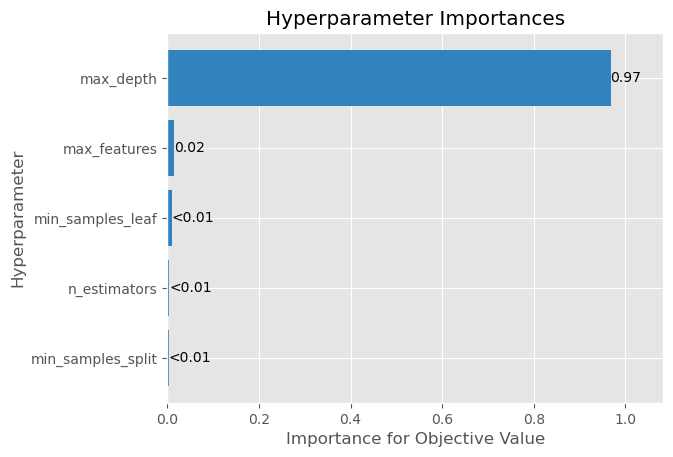

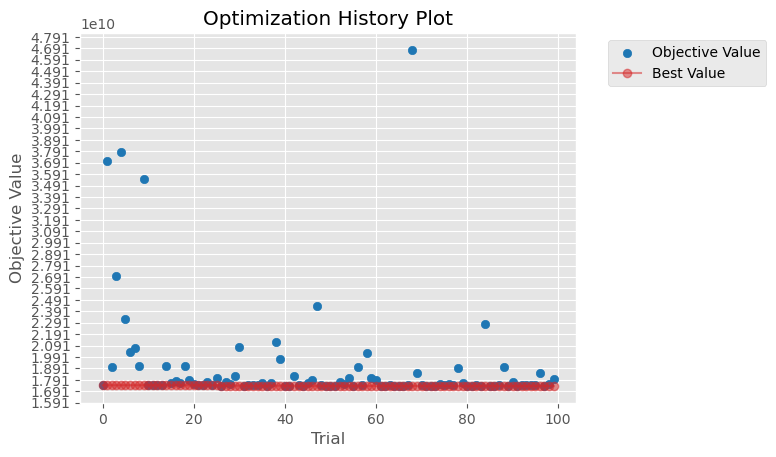

In [56]:
from optuna.visualization.matplotlib import plot_param_importances
from optuna.visualization.matplotlib import plot_optimization_history

# 하이퍼파라미터별 중요도 확인
plot_param_importances(study)

# 하이퍼파라미터 최적화 과정 확인
import matplotlib.pyplot as plt
import numpy as np

fig = plot_optimization_history(study)

# 현재 y 축의 범위를 얻기
ax = plt.gca()
min_val, max_val = ax.get_ylim()

step = 1000000000  # 이 값을 조절하여 yticks의 간격을 설정
new_ticks = np.arange(min_val, max_val, step)
ax.set_yticks(new_ticks)

In [54]:
print(min_val, max_val)

15912660500.992962 48245105720.5702


## CatBoostRegressor를 활용한 가격 예측 모델

In [61]:
import optuna
from catboost import CatBoostRegressor

def objectiveCatB(trial):
    # Define the search space for each parameter
    params = {
        'iterations': trial.suggest_int('iterations', 100, 4000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
        'random_seed': 42,
        'loss_function': 'RMSE',
        'eval_metric': 'RMSE',
        'verbose': False
    }
    # 손실함수와 평가지표를 RMSE로 하는 이유
    # (1) 예측 오차의 크기를 실제 값의 단위로 해석하고자 할 때 유용
    # (2) RMSE는 MSE와 동일한 오차 척도를 가지지만, 제곱근의 적용으로 오차의 크기를 실제 값의 단위로 변환
    #     이로 인해 RMSE는 예측 오차의 크기에 덜 민감하게 반응함
    
    # 모델 학습
    cat_features = ['quality'] # 범주형 데이터 'quality' : CatBoost의 cat_features 매개변수에 전달 필요
    catboost = CatBoostRegressor(**params)
    catboost.fit(x_train, y_train, eval_set=(x_test, y_test), early_stopping_rounds=50, verbose=False, cat_features=cat_features)
    
    # 예측
    y_pred = catboost.predict(x_test)
    
    # 모델 평가    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"mse : {mse}")
    print(f"rmse : {rmse}")
    print(f"r2 : {r2}")
    
    return mse

In [62]:
# optimization study 진행
# direction: score 값을 최대 or 최소로 하는 방향으로 지정
study2 = optuna.create_study(direction='minimize')

# n_trials: 시도 횟수 (미입력시 key interrupt가 있을 때까지 무한 반복)
study2.optimize(objectiveCatB, n_trials=100)

# 모든 트라이얼이 완료되었는지 확인
if study2.best_trial is None:
    print("No trials completed.")
else:
    # 최적의 트라이얼 출력
    print('Best trial: score {}, \nparams {}'.format(study2.best_trial.value, study2.best_trial.params))

[I 2023-06-13 10:54:01,288] A new study created in memory with name: no-name-6530fa1e-2904-4eea-ac72-8eed4306800e
C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 10:54:11,730] Trial 0 finished with value: 19821336517.72387 and parameters: {'iterations': 214, 'learning_rate': 0.03836143247530876, 'depth': 6, 'l2_leaf_reg': 0.0004317812047818332}. Best is trial 0 with value: 19821336517.72387.


mse : 19821336517.72387
rmse : 140788.26839521775
r2 : 0.8085746378495381


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 10:54:41,162] Trial 1 finished with value: 17173942791.324183 and parameters: {'iterations': 1979, 'learning_rate': 0.06930295002902043, 'depth': 9, 'l2_leaf_reg': 0.05739955704806684}. Best is trial 1 with value: 17173942791.324183.


mse : 17173942791.324183
rmse : 131049.39065605831
r2 : 0.8341419502443289


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 10:55:06,524] Trial 2 finished with value: 17858724446.356106 and parameters: {'iterations': 705, 'learning_rate': 0.0711467230617822, 'depth': 5, 'l2_leaf_reg': 1.8182943447934695e-05}. Best is trial 1 with value: 17173942791.324183.


mse : 17858724446.356106
rmse : 133636.53859014797
r2 : 0.8275286436092659


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 10:55:35,557] Trial 3 finished with value: 17120253310.950056 and parameters: {'iterations': 2788, 'learning_rate': 0.07580369095295048, 'depth': 9, 'l2_leaf_reg': 0.0001466169440201493}. Best is trial 3 with value: 17120253310.950056.


mse : 17120253310.950056
rmse : 130844.38585950127
r2 : 0.8346604585807924


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 10:55:48,115] Trial 4 finished with value: 17966410430.17827 and parameters: {'iterations': 208, 'learning_rate': 0.05435176310000589, 'depth': 9, 'l2_leaf_reg': 0.03396266733216595}. Best is trial 3 with value: 17120253310.950056.


mse : 17966410430.17827
rmse : 134038.83926003787
r2 : 0.8264886618485379


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 10:56:38,100] Trial 5 finished with value: 17295390820.882587 and parameters: {'iterations': 1354, 'learning_rate': 0.08949167674550981, 'depth': 9, 'l2_leaf_reg': 12.705927334071609}. Best is trial 3 with value: 17120253310.950056.


mse : 17295390820.882587
rmse : 131511.94174249953
r2 : 0.8329690609681749


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 10:56:57,500] Trial 6 finished with value: 17357761702.691643 and parameters: {'iterations': 1165, 'learning_rate': 0.09550478088730789, 'depth': 10, 'l2_leaf_reg': 0.0011997286508828643}. Best is trial 3 with value: 17120253310.950056.


mse : 17357761702.691643
rmse : 131748.85844929222
r2 : 0.8323667116448956


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 10:57:44,569] Trial 7 finished with value: 17158867440.105513 and parameters: {'iterations': 3832, 'learning_rate': 0.045560805055178295, 'depth': 9, 'l2_leaf_reg': 0.00727325457618988}. Best is trial 3 with value: 17120253310.950056.


mse : 17158867440.105513
rmse : 130991.86020553153
r2 : 0.8342875410607705


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 10:58:10,227] Trial 8 finished with value: 17747297796.5324 and parameters: {'iterations': 3392, 'learning_rate': 0.07922073337260269, 'depth': 5, 'l2_leaf_reg': 0.7117368097428808}. Best is trial 3 with value: 17120253310.950056.


mse : 17747297796.5324
rmse : 133218.9843698427
r2 : 0.828604751003772


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 10:59:01,744] Trial 9 finished with value: 17291712336.52421 and parameters: {'iterations': 3254, 'learning_rate': 0.04976480661191664, 'depth': 7, 'l2_leaf_reg': 4.57516736616847e-05}. Best is trial 3 with value: 17120253310.950056.


mse : 17291712336.52421
rmse : 131497.95563629197
r2 : 0.8330045860802094


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:00:45,341] Trial 10 finished with value: 17329115205.060787 and parameters: {'iterations': 2570, 'learning_rate': 0.015919484905243142, 'depth': 7, 'l2_leaf_reg': 1.4370274922636043e-05}. Best is trial 3 with value: 17120253310.950056.


mse : 17329115205.060787
rmse : 131640.09725406917
r2 : 0.8326433663587907


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:01:36,244] Trial 11 finished with value: 17005591984.883333 and parameters: {'iterations': 3852, 'learning_rate': 0.03704956364010855, 'depth': 10, 'l2_leaf_reg': 0.0013921237239924848}. Best is trial 11 with value: 17005591984.883333.


mse : 17005591984.883333
rmse : 130405.49062398919
r2 : 0.8357678049924406


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:02:36,151] Trial 12 finished with value: 16979773711.575397 and parameters: {'iterations': 2721, 'learning_rate': 0.02465627905009301, 'depth': 10, 'l2_leaf_reg': 0.00029237891584553253}. Best is trial 12 with value: 16979773711.575397.


mse : 16979773711.575397
rmse : 130306.46074379965
r2 : 0.8360171460151135


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:03:41,729] Trial 13 finished with value: 16990361356.127262 and parameters: {'iterations': 3946, 'learning_rate': 0.02741252171296538, 'depth': 10, 'l2_leaf_reg': 0.0007709219147743232}. Best is trial 12 with value: 16979773711.575397.


mse : 16990361356.127262
rmse : 130347.08035137289
r2 : 0.8359148954080038


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:05:12,723] Trial 14 finished with value: 17218577480.765373 and parameters: {'iterations': 2159, 'learning_rate': 0.017884090554632425, 'depth': 8, 'l2_leaf_reg': 0.0003491561340296701}. Best is trial 12 with value: 16979773711.575397.


mse : 17218577480.765373
rmse : 131219.57735324927
r2 : 0.8337108889189176


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:06:30,901] Trial 15 finished with value: 17057024695.304184 and parameters: {'iterations': 3191, 'learning_rate': 0.025606004976598012, 'depth': 10, 'l2_leaf_reg': 0.0034232051328063518}. Best is trial 12 with value: 16979773711.575397.


mse : 17057024695.304184
rmse : 130602.54475049168
r2 : 0.835271091503424


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:07:43,745] Trial 16 finished with value: 17033362639.078768 and parameters: {'iterations': 2093, 'learning_rate': 0.027661473132726558, 'depth': 8, 'l2_leaf_reg': 0.00011193992505695533}. Best is trial 12 with value: 16979773711.575397.


mse : 17033362639.078768
rmse : 130511.92527535086
r2 : 0.8354996087720816


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:09:07,330] Trial 17 finished with value: 18190432177.86505 and parameters: {'iterations': 3981, 'learning_rate': 0.011733600445220585, 'depth': 4, 'l2_leaf_reg': 0.00804786020265707}. Best is trial 12 with value: 16979773711.575397.


mse : 18190432177.86505
rmse : 134871.9102625341
r2 : 0.8243251627251474


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:09:58,464] Trial 18 finished with value: 17154847626.062372 and parameters: {'iterations': 2771, 'learning_rate': 0.03197448797349616, 'depth': 8, 'l2_leaf_reg': 0.00012086983708816697}. Best is trial 12 with value: 16979773711.575397.


mse : 17154847626.062372
rmse : 130976.51555169107
r2 : 0.8343263625780935


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:11:19,998] Trial 19 finished with value: 16958151840.425182 and parameters: {'iterations': 3427, 'learning_rate': 0.020102887536213247, 'depth': 10, 'l2_leaf_reg': 0.0007464012986362586}. Best is trial 19 with value: 16958151840.425182.


mse : 16958151840.425182
rmse : 130223.46885421683
r2 : 0.8362259601135775


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:13:11,307] Trial 20 finished with value: 17179078825.28057 and parameters: {'iterations': 2428, 'learning_rate': 0.011077150459003078, 'depth': 8, 'l2_leaf_reg': 1.0434429897277096e-05}. Best is trial 19 with value: 16958151840.425182.


mse : 17179078825.28057
rmse : 131068.98498607735
r2 : 0.8340923487878762


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:14:27,361] Trial 21 finished with value: 16976757593.525213 and parameters: {'iterations': 3663, 'learning_rate': 0.021870001540249547, 'depth': 10, 'l2_leaf_reg': 0.0007211195432551702}. Best is trial 19 with value: 16958151840.425182.


mse : 16976757593.525213
rmse : 130294.88705826185
r2 : 0.8360462742976351


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:15:48,141] Trial 22 finished with value: 16989613657.735918 and parameters: {'iterations': 3409, 'learning_rate': 0.020623457197717673, 'depth': 10, 'l2_leaf_reg': 0.002778463372140477}. Best is trial 19 with value: 16958151840.425182.


mse : 16989613657.735918
rmse : 130344.21221418279
r2 : 0.8359221163355742


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:17:02,645] Trial 23 finished with value: 17055515441.852005 and parameters: {'iterations': 2987, 'learning_rate': 0.021078390752360374, 'depth': 10, 'l2_leaf_reg': 0.00028287555737704277}. Best is trial 19 with value: 16958151840.425182.


mse : 17055515441.852005
rmse : 130596.76658268383
r2 : 0.8352856671799129


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:17:45,066] Trial 24 finished with value: 17178865188.363314 and parameters: {'iterations': 3580, 'learning_rate': 0.03586461867890649, 'depth': 9, 'l2_leaf_reg': 5.2511909282019605e-05}. Best is trial 19 with value: 16958151840.425182.


mse : 17178865188.363314
rmse : 131068.17000463276
r2 : 0.8340944119950781


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:18:55,257] Trial 25 finished with value: 17019777983.75839 and parameters: {'iterations': 3004, 'learning_rate': 0.022875989932783412, 'depth': 10, 'l2_leaf_reg': 0.0005633389349574917}. Best is trial 19 with value: 16958151840.425182.


mse : 17019777983.75839
rmse : 130459.87116258543
r2 : 0.8356308031323645


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:19:26,595] Trial 26 finished with value: 17162142327.877033 and parameters: {'iterations': 3587, 'learning_rate': 0.043131265812917235, 'depth': 9, 'l2_leaf_reg': 0.011115932784821854}. Best is trial 19 with value: 16958151840.425182.


mse : 17162142327.877033
rmse : 131004.35995751071
r2 : 0.8342559136991592


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:20:24,184] Trial 27 finished with value: 17246603413.47319 and parameters: {'iterations': 2441, 'learning_rate': 0.030199105610905184, 'depth': 8, 'l2_leaf_reg': 0.0016144868569716888}. Best is trial 19 with value: 16958151840.425182.


mse : 17246603413.47319
rmse : 131326.32414513547
r2 : 0.8334402273359612


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:21:20,160] Trial 28 finished with value: 17704363433.51856 and parameters: {'iterations': 1720, 'learning_rate': 0.016440709695398598, 'depth': 6, 'l2_leaf_reg': 3.88139889023635e-05}. Best is trial 19 with value: 16958151840.425182.


mse : 17704363433.51856
rmse : 133057.74473332457
r2 : 0.8290193913576793


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:22:11,918] Trial 29 finished with value: 16955785545.63508 and parameters: {'iterations': 3568, 'learning_rate': 0.03455548115099196, 'depth': 10, 'l2_leaf_reg': 0.00038594107288706384}. Best is trial 29 with value: 16955785545.63508.


mse : 16955785545.63508
rmse : 130214.38302136627
r2 : 0.8362488127015826


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:23:01,086] Trial 30 finished with value: 17155289299.425941 and parameters: {'iterations': 3615, 'learning_rate': 0.03492190755817217, 'depth': 9, 'l2_leaf_reg': 0.0006992405515755559}. Best is trial 29 with value: 16955785545.63508.


mse : 17155289299.425941
rmse : 130978.20161929977
r2 : 0.8343220970996531


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:24:09,683] Trial 31 finished with value: 17051357568.586546 and parameters: {'iterations': 3026, 'learning_rate': 0.025349543446957327, 'depth': 10, 'l2_leaf_reg': 0.00022062075809204458}. Best is trial 29 with value: 16955785545.63508.


mse : 17051357568.586546
rmse : 130580.84686732027
r2 : 0.8353258220097804


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:24:51,370] Trial 32 finished with value: 17170149774.912172 and parameters: {'iterations': 3603, 'learning_rate': 0.04002559924939094, 'depth': 10, 'l2_leaf_reg': 0.00038300055008884176}. Best is trial 29 with value: 16955785545.63508.


mse : 17170149774.912172
rmse : 131034.91815127818
r2 : 0.8341785814543213


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:25:59,154] Trial 33 finished with value: 16899871504.158113 and parameters: {'iterations': 3203, 'learning_rate': 0.03137452567384212, 'depth': 10, 'l2_leaf_reg': 9.734496531093227e-05}. Best is trial 33 with value: 16899871504.158113.


mse : 16899871504.158113
rmse : 129999.50578428409
r2 : 0.8367888048272121


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:26:45,129] Trial 34 finished with value: 17084702427.605328 and parameters: {'iterations': 3217, 'learning_rate': 0.031983582690088413, 'depth': 9, 'l2_leaf_reg': 5.7963410878080725e-05}. Best is trial 33 with value: 16899871504.158113.


mse : 17084702427.605328
rmse : 130708.46348880905
r2 : 0.8350037926800318


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:27:30,160] Trial 35 finished with value: 16849371454.269333 and parameters: {'iterations': 3434, 'learning_rate': 0.040658411489512505, 'depth': 9, 'l2_leaf_reg': 0.00010682022944241584}. Best is trial 35 with value: 16849371454.269333.


mse : 16849371454.269333
rmse : 129805.12876719984
r2 : 0.837276511109275


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:27:55,224] Trial 36 finished with value: 17335973857.990643 and parameters: {'iterations': 503, 'learning_rate': 0.05881869749245124, 'depth': 9, 'l2_leaf_reg': 2.6135367866570498e-05}. Best is trial 35 with value: 16849371454.269333.


mse : 17335973857.990643
rmse : 131666.1454512535
r2 : 0.8325771286396648


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:28:40,546] Trial 37 finished with value: 17038979178.084536 and parameters: {'iterations': 3375, 'learning_rate': 0.039974564785073885, 'depth': 9, 'l2_leaf_reg': 9.991026956572898e-05}. Best is trial 35 with value: 16849371454.269333.


mse : 17038979178.084536
rmse : 130533.44084212495
r2 : 0.8354453668186065


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:29:27,029] Trial 38 finished with value: 17090607888.984814 and parameters: {'iterations': 3047, 'learning_rate': 0.045755005430873325, 'depth': 10, 'l2_leaf_reg': 2.5882075765842223e-05}. Best is trial 35 with value: 16849371454.269333.


mse : 17090607888.984814
rmse : 130731.05173976385
r2 : 0.8349467604470023


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:30:08,467] Trial 39 finished with value: 17133839474.763826 and parameters: {'iterations': 1642, 'learning_rate': 0.03294887734287894, 'depth': 9, 'l2_leaf_reg': 0.00010799584206916762}. Best is trial 35 with value: 16849371454.269333.


mse : 17133839474.763826
rmse : 130896.2928228444
r2 : 0.8345292496521733


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:30:57,392] Trial 40 finished with value: 17146635326.999973 and parameters: {'iterations': 1060, 'learning_rate': 0.03754519582462004, 'depth': 8, 'l2_leaf_reg': 1.0002033380879253e-05}. Best is trial 35 with value: 16849371454.269333.


mse : 17146635326.999973
rmse : 130945.16152573173
r2 : 0.8344056731897014


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:31:53,037] Trial 41 finished with value: 17071056098.760424 and parameters: {'iterations': 3761, 'learning_rate': 0.029214502058217785, 'depth': 10, 'l2_leaf_reg': 0.00018292611053048914}. Best is trial 35 with value: 16849371454.269333.


mse : 17071056098.760424
rmse : 130656.25166351751
r2 : 0.8351355826548815


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:32:39,080] Trial 42 finished with value: 17079980283.315493 and parameters: {'iterations': 3727, 'learning_rate': 0.030171857567321318, 'depth': 10, 'l2_leaf_reg': 0.0011470718518967115}. Best is trial 35 with value: 16849371454.269333.


mse : 17079980283.315493
rmse : 130690.3985888615
r2 : 0.8350493969802262


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:34:00,578] Trial 43 finished with value: 17002172047.313356 and parameters: {'iterations': 3486, 'learning_rate': 0.020517301477291486, 'depth': 10, 'l2_leaf_reg': 0.0006708402840303367}. Best is trial 35 with value: 16849371454.269333.


mse : 17002172047.313356
rmse : 130392.37725922998
r2 : 0.8358008331783694


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:35:19,180] Trial 44 finished with value: 17240716466.490704 and parameters: {'iterations': 3251, 'learning_rate': 0.01561086301110573, 'depth': 9, 'l2_leaf_reg': 8.045587159626761e-05}. Best is trial 35 with value: 16849371454.269333.


mse : 17240716466.490704
rmse : 131303.9088012642
r2 : 0.83349708076545


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:36:31,949] Trial 45 finished with value: 16994182840.09072 and parameters: {'iterations': 3783, 'learning_rate': 0.02466097087991021, 'depth': 10, 'l2_leaf_reg': 0.0002022427503702906}. Best is trial 35 with value: 16849371454.269333.


mse : 16994182840.09072
rmse : 130361.73840544901
r2 : 0.8358779892714775


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:37:11,106] Trial 46 finished with value: 17554402371.691273 and parameters: {'iterations': 3344, 'learning_rate': 0.03383658259750613, 'depth': 6, 'l2_leaf_reg': 2.145988731012615e-05}. Best is trial 35 with value: 16849371454.269333.


mse : 17554402371.691273
rmse : 132493.0276342543
r2 : 0.8304676464005765


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:38:05,970] Trial 47 finished with value: 16947716234.596067 and parameters: {'iterations': 2890, 'learning_rate': 0.04029270241480863, 'depth': 10, 'l2_leaf_reg': 0.0004375278654237937}. Best is trial 35 with value: 16849371454.269333.


mse : 16947716234.596067
rmse : 130183.39461926805
r2 : 0.8363267424005495


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:38:38,745] Trial 48 finished with value: 17383727557.754135 and parameters: {'iterations': 2723, 'learning_rate': 0.049510333623911676, 'depth': 7, 'l2_leaf_reg': 0.0027954840735194327}. Best is trial 35 with value: 16849371454.269333.


mse : 17383727557.754135
rmse : 131847.36462195267
r2 : 0.8321159453454365


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:39:19,751] Trial 49 finished with value: 17007557001.545078 and parameters: {'iterations': 3141, 'learning_rate': 0.04113828993800242, 'depth': 10, 'l2_leaf_reg': 4.909045077020228e-05}. Best is trial 35 with value: 16849371454.269333.


mse : 17007557001.545078
rmse : 130413.02466220572
r2 : 0.8357488277642517


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:40:06,623] Trial 50 finished with value: 16954497965.736177 and parameters: {'iterations': 2882, 'learning_rate': 0.03761160832276439, 'depth': 9, 'l2_leaf_reg': 0.0004448661254444054}. Best is trial 35 with value: 16849371454.269333.


mse : 16954497965.736177
rmse : 130209.43885040046
r2 : 0.8362612475567309


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:40:49,268] Trial 51 finished with value: 17131645049.746824 and parameters: {'iterations': 2860, 'learning_rate': 0.03662059651435416, 'depth': 9, 'l2_leaf_reg': 0.00039774480194667346}. Best is trial 35 with value: 16849371454.269333.


mse : 17131645049.746824
rmse : 130887.91025051483
r2 : 0.834550442400867


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:41:22,211] Trial 52 finished with value: 17119857232.333069 and parameters: {'iterations': 2478, 'learning_rate': 0.045115948535723316, 'depth': 9, 'l2_leaf_reg': 0.00017278546823868736}. Best is trial 35 with value: 16849371454.269333.


mse : 17119857232.333069
rmse : 130842.87230236529
r2 : 0.8346642837261163


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:42:37,458] Trial 53 finished with value: 17083499031.894632 and parameters: {'iterations': 2300, 'learning_rate': 0.027620616316929622, 'depth': 9, 'l2_leaf_reg': 0.0003832594064803689}. Best is trial 35 with value: 16849371454.269333.


mse : 17083499031.894632
rmse : 130703.86004971174
r2 : 0.8350154145229647


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:43:22,966] Trial 54 finished with value: 17090331668.47064 and parameters: {'iterations': 2878, 'learning_rate': 0.03853655086560118, 'depth': 10, 'l2_leaf_reg': 8.230904949124662e-05}. Best is trial 35 with value: 16849371454.269333.


mse : 17090331668.47064
rmse : 130729.99528979813
r2 : 0.8349494280578322


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:43:59,299] Trial 55 finished with value: 18103183501.852497 and parameters: {'iterations': 3485, 'learning_rate': 0.035163738972786296, 'depth': 4, 'l2_leaf_reg': 0.001155641531366892}. Best is trial 35 with value: 16849371454.269333.


mse : 18103183501.852497
rmse : 134548.07134200213
r2 : 0.8251677703559658


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:44:39,983] Trial 56 finished with value: 17050545478.385405 and parameters: {'iterations': 2656, 'learning_rate': 0.04207793714349515, 'depth': 10, 'l2_leaf_reg': 0.00015179878183172433}. Best is trial 35 with value: 16849371454.269333.


mse : 17050545478.385405
rmse : 130577.73729999078
r2 : 0.8353336648038682


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:45:23,488] Trial 57 finished with value: 17103145461.610111 and parameters: {'iterations': 3132, 'learning_rate': 0.030778535177866835, 'depth': 8, 'l2_leaf_reg': 0.00026731001287595344}. Best is trial 35 with value: 16849371454.269333.


mse : 17103145461.610111
rmse : 130778.99472625606
r2 : 0.834825678330358


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:45:57,769] Trial 58 finished with value: 17166379780.78921 and parameters: {'iterations': 3886, 'learning_rate': 0.049537957113232035, 'depth': 7, 'l2_leaf_reg': 0.0018253851863316746}. Best is trial 35 with value: 16849371454.269333.


mse : 17166379780.78921
rmse : 131020.53190545828
r2 : 0.8342149903256226


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:46:52,055] Trial 59 finished with value: 17670731816.548344 and parameters: {'iterations': 3309, 'learning_rate': 0.027919808527785625, 'depth': 5, 'l2_leaf_reg': 0.006039718517437047}. Best is trial 35 with value: 16849371454.269333.


mse : 17670731816.548344
rmse : 132931.30487792686
r2 : 0.8293441900639861


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:47:37,420] Trial 60 finished with value: 17173160196.056948 and parameters: {'iterations': 2224, 'learning_rate': 0.03816493367428661, 'depth': 10, 'l2_leaf_reg': 0.00048110475757796466}. Best is trial 35 with value: 16849371454.269333.


mse : 17173160196.056948
rmse : 131046.4047429648
r2 : 0.834149508189895


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:49:13,313] Trial 61 finished with value: 16983373483.942875 and parameters: {'iterations': 3989, 'learning_rate': 0.03374558587962958, 'depth': 10, 'l2_leaf_reg': 0.0013104268194194903}. Best is trial 35 with value: 16849371454.269333.


mse : 16983373483.942875
rmse : 130320.27272816334
r2 : 0.8359823810673266


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:50:34,026] Trial 62 finished with value: 17102161545.521801 and parameters: {'iterations': 3486, 'learning_rate': 0.023884723879800965, 'depth': 10, 'l2_leaf_reg': 0.0007533508096430499}. Best is trial 35 with value: 16849371454.269333.


mse : 17102161545.521801
rmse : 130775.23292092353
r2 : 0.834835180539927


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:52:40,908] Trial 63 finished with value: 16948257210.97801 and parameters: {'iterations': 3681, 'learning_rate': 0.018844262610948934, 'depth': 10, 'l2_leaf_reg': 0.0008259836227967348}. Best is trial 35 with value: 16849371454.269333.


mse : 16948257210.97801
rmse : 130185.47234994391
r2 : 0.8363215178991776


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:55:05,669] Trial 64 finished with value: 17010137981.262157 and parameters: {'iterations': 2891, 'learning_rate': 0.013920922039231318, 'depth': 10, 'l2_leaf_reg': 0.0003135701075778047}. Best is trial 35 with value: 16849371454.269333.


mse : 17010137981.262157
rmse : 130422.91969305916
r2 : 0.8357239018478483


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:56:28,825] Trial 65 finished with value: 16973215767.28044 and parameters: {'iterations': 3464, 'learning_rate': 0.01984247380418224, 'depth': 9, 'l2_leaf_reg': 0.00012893871539919357}. Best is trial 35 with value: 16849371454.269333.


mse : 16973215767.28044
rmse : 130281.29477127727
r2 : 0.8360804796283894


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:57:33,052] Trial 66 finished with value: 17103492286.624323 and parameters: {'iterations': 3687, 'learning_rate': 0.02639533535611653, 'depth': 10, 'l2_leaf_reg': 0.004509838517013556}. Best is trial 35 with value: 16849371454.269333.


mse : 17103492286.624323
rmse : 130780.32071617014
r2 : 0.8348223288537024


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 11:58:54,792] Trial 67 finished with value: 17063089888.36202 and parameters: {'iterations': 2600, 'learning_rate': 0.017723183721849625, 'depth': 9, 'l2_leaf_reg': 0.0024115434651871877}. Best is trial 35 with value: 16849371454.269333.


mse : 17063089888.36202
rmse : 130625.76272834552
r2 : 0.8352125166552259


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 12:00:21,925] Trial 68 finished with value: 16999809253.168362 and parameters: {'iterations': 1935, 'learning_rate': 0.018857373510252216, 'depth': 10, 'l2_leaf_reg': 0.000909623922117817}. Best is trial 35 with value: 16849371454.269333.


mse : 16999809253.168362
rmse : 130383.31662129308
r2 : 0.8358236519587523


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 12:03:09,088] Trial 69 finished with value: 16994749324.31991 and parameters: {'iterations': 3191, 'learning_rate': 0.01006545661781843, 'depth': 9, 'l2_leaf_reg': 0.0004939990477619583}. Best is trial 35 with value: 16849371454.269333.


mse : 16994749324.31991
rmse : 130363.9111269676
r2 : 0.8358725184270352


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 12:04:31,501] Trial 70 finished with value: 17041877799.342642 and parameters: {'iterations': 3860, 'learning_rate': 0.022701163369290463, 'depth': 10, 'l2_leaf_reg': 3.3617066849584204e-05}. Best is trial 35 with value: 16849371454.269333.


mse : 17041877799.342642
rmse : 130544.5433533805
r2 : 0.8354173732661245


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 12:05:38,837] Trial 71 finished with value: 17124424818.656832 and parameters: {'iterations': 3425, 'learning_rate': 0.01978150914595614, 'depth': 9, 'l2_leaf_reg': 6.78092206064063e-05}. Best is trial 35 with value: 16849371454.269333.


mse : 17124424818.656832
rmse : 130860.32560962407
r2 : 0.8346201720757542


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 12:08:07,638] Trial 72 finished with value: 17102392874.727953 and parameters: {'iterations': 3530, 'learning_rate': 0.012803177678683067, 'depth': 9, 'l2_leaf_reg': 0.0001456415994905988}. Best is trial 35 with value: 16849371454.269333.


mse : 17102392874.727953
rmse : 130776.11737136086
r2 : 0.8348329464687269


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 12:08:50,058] Trial 73 finished with value: 17209353958.22124 and parameters: {'iterations': 3084, 'learning_rate': 0.03131711382823072, 'depth': 8, 'l2_leaf_reg': 0.00021998737247592905}. Best is trial 35 with value: 16849371454.269333.


mse : 17209353958.22124
rmse : 131184.42727024134
r2 : 0.8337999654623552


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 12:10:19,835] Trial 74 finished with value: 16956552227.492912 and parameters: {'iterations': 2931, 'learning_rate': 0.015265942782223626, 'depth': 10, 'l2_leaf_reg': 0.00011558810560773442}. Best is trial 35 with value: 16849371454.269333.


mse : 16956552227.492912
rmse : 130217.32690964329
r2 : 0.8362414084404138


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 12:12:12,867] Trial 75 finished with value: 17138311970.167593 and parameters: {'iterations': 3277, 'learning_rate': 0.014567190588007987, 'depth': 10, 'l2_leaf_reg': 3.9138863872262716e-05}. Best is trial 35 with value: 16849371454.269333.


mse : 17138311970.167593
rmse : 130913.37582603082
r2 : 0.8344860563462317


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 12:14:02,210] Trial 76 finished with value: 16951193992.093927 and parameters: {'iterations': 2842, 'learning_rate': 0.0164010862797969, 'depth': 10, 'l2_leaf_reg': 9.131131787467911e-05}. Best is trial 35 with value: 16849371454.269333.


mse : 16951193992.093927
rmse : 130196.75108117686
r2 : 0.8362931558163197


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 12:15:29,362] Trial 77 finished with value: 17033372684.658382 and parameters: {'iterations': 2981, 'learning_rate': 0.016597952684741162, 'depth': 10, 'l2_leaf_reg': 1.5887176671043276e-05}. Best is trial 35 with value: 16849371454.269333.


mse : 17033372684.658382
rmse : 130511.96376063913
r2 : 0.8354995117564887


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 12:17:50,918] Trial 78 finished with value: 17013256689.383112 and parameters: {'iterations': 2825, 'learning_rate': 0.012661216286236305, 'depth': 10, 'l2_leaf_reg': 8.24621484256449e-05}. Best is trial 35 with value: 16849371454.269333.


mse : 17013256689.383112
rmse : 130434.87528028351
r2 : 0.8356937827975531


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 12:19:04,438] Trial 79 finished with value: 17049502300.165865 and parameters: {'iterations': 2929, 'learning_rate': 0.02224272372029326, 'depth': 10, 'l2_leaf_reg': 6.83543506504607e-05}. Best is trial 35 with value: 16849371454.269333.


mse : 17049502300.165865
rmse : 130573.7427669356
r2 : 0.8353437393398756


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 12:20:11,941] Trial 80 finished with value: 16984289567.690746 and parameters: {'iterations': 2513, 'learning_rate': 0.026131466609063955, 'depth': 10, 'l2_leaf_reg': 0.0002478385309579081}. Best is trial 35 with value: 16849371454.269333.


mse : 16984289567.690746
rmse : 130323.78742075733
r2 : 0.8359735339513392


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 12:21:41,162] Trial 81 finished with value: 16951911899.636984 and parameters: {'iterations': 2731, 'learning_rate': 0.018194014439003602, 'depth': 10, 'l2_leaf_reg': 0.00012136428463318222}. Best is trial 35 with value: 16849371454.269333.


mse : 16951911899.636984
rmse : 130199.5080621927
r2 : 0.8362862225950761


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 12:22:45,005] Trial 82 finished with value: 17056652265.708485 and parameters: {'iterations': 2358, 'learning_rate': 0.029279942624471575, 'depth': 10, 'l2_leaf_reg': 0.00012924359354404694}. Best is trial 35 with value: 16849371454.269333.


mse : 17056652265.708485
rmse : 130601.11892977213
r2 : 0.8352746882573648


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 12:24:16,800] Trial 83 finished with value: 16971714240.977032 and parameters: {'iterations': 2691, 'learning_rate': 0.018011625507193516, 'depth': 10, 'l2_leaf_reg': 3.58901712394572e-05}. Best is trial 35 with value: 16849371454.269333.


mse : 16971714240.977032
rmse : 130275.53201187486
r2 : 0.8360949806796253


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 12:26:03,670] Trial 84 finished with value: 17064015070.70791 and parameters: {'iterations': 2787, 'learning_rate': 0.014122017610307128, 'depth': 10, 'l2_leaf_reg': 5.512304580068704e-05}. Best is trial 35 with value: 16849371454.269333.


mse : 17064015070.70791
rmse : 130629.30402749572
r2 : 0.8352035816691588


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 12:27:22,741] Trial 85 finished with value: 17140998085.399961 and parameters: {'iterations': 3080, 'learning_rate': 0.02392754926854164, 'depth': 9, 'l2_leaf_reg': 0.0004906870553775548}. Best is trial 35 with value: 16849371454.269333.


mse : 17140998085.399961
rmse : 130923.63455617921
r2 : 0.8344601150793209


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 12:30:06,595] Trial 86 finished with value: 17089030371.999207 and parameters: {'iterations': 2987, 'learning_rate': 0.01106875005093019, 'depth': 10, 'l2_leaf_reg': 0.00010106177037661026}. Best is trial 35 with value: 16849371454.269333.


mse : 17089030371.999207
rmse : 130725.01815643098
r2 : 0.8349619953813368


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 12:31:11,873] Trial 87 finished with value: 17045421253.007423 and parameters: {'iterations': 2609, 'learning_rate': 0.03572774374370207, 'depth': 10, 'l2_leaf_reg': 0.00032076166296198764}. Best is trial 35 with value: 16849371454.269333.


mse : 17045421253.007423
rmse : 130558.1144663457
r2 : 0.8353831522184956


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 12:33:20,539] Trial 88 finished with value: 17025968572.661707 and parameters: {'iterations': 3188, 'learning_rate': 0.015982764181646913, 'depth': 10, 'l2_leaf_reg': 0.00016241012945627514}. Best is trial 35 with value: 16849371454.269333.


mse : 17025968572.661707
rmse : 130483.59503271554
r2 : 0.8355710172686976


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 12:34:11,486] Trial 89 finished with value: 17108269925.054094 and parameters: {'iterations': 3664, 'learning_rate': 0.03373130664619972, 'depth': 9, 'l2_leaf_reg': 0.0001941618122886327}. Best is trial 35 with value: 16849371454.269333.


mse : 17108269925.054094
rmse : 130798.58533277069
r2 : 0.8347761886165985


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 12:35:00,046] Trial 90 finished with value: 16955160750.136724 and parameters: {'iterations': 3347, 'learning_rate': 0.03913638525984145, 'depth': 10, 'l2_leaf_reg': 1.8862588914025347e-05}. Best is trial 35 with value: 16849371454.269333.


mse : 16955160750.136724
rmse : 130211.98389601751
r2 : 0.8362548466894741


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 12:35:44,390] Trial 91 finished with value: 17033466323.035505 and parameters: {'iterations': 3344, 'learning_rate': 0.04328232403538124, 'depth': 10, 'l2_leaf_reg': 5.270131384563908e-05}. Best is trial 35 with value: 16849371454.269333.


mse : 17033466323.035505
rmse : 130512.32249498706
r2 : 0.83549860744006


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 12:36:32,964] Trial 92 finished with value: 17043602223.926668 and parameters: {'iterations': 2782, 'learning_rate': 0.03851575944359703, 'depth': 10, 'l2_leaf_reg': 1.572479343600126e-05}. Best is trial 35 with value: 16849371454.269333.


mse : 17043602223.926668
rmse : 130551.14792266925
r2 : 0.8354007195656941


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 12:37:18,489] Trial 93 finished with value: 17098968063.812689 and parameters: {'iterations': 3586, 'learning_rate': 0.03227358741387473, 'depth': 10, 'l2_leaf_reg': 2.1094090654076376e-05}. Best is trial 35 with value: 16849371454.269333.


mse : 17098968063.812689
rmse : 130763.02254006172
r2 : 0.8348660217191857


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 12:37:58,613] Trial 94 finished with value: 17051384715.197693 and parameters: {'iterations': 3297, 'learning_rate': 0.04028306166660374, 'depth': 10, 'l2_leaf_reg': 2.7315356780963262e-05}. Best is trial 35 with value: 16849371454.269333.


mse : 17051384715.197693
rmse : 130580.9508128873
r2 : 0.8353255598402811


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 12:38:58,904] Trial 95 finished with value: 16944056966.313011 and parameters: {'iterations': 3087, 'learning_rate': 0.03614691990210196, 'depth': 10, 'l2_leaf_reg': 0.00010526109336495462}. Best is trial 35 with value: 16849371454.269333.


mse : 16944056966.313011
rmse : 130169.33957853905
r2 : 0.8363620819325565


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 12:39:37,260] Trial 96 finished with value: 17122743477.236967 and parameters: {'iterations': 3104, 'learning_rate': 0.03673787730927343, 'depth': 9, 'l2_leaf_reg': 8.208343998787519e-05}. Best is trial 35 with value: 16849371454.269333.


mse : 17122743477.236967
rmse : 130853.90126869343
r2 : 0.8346364096987777


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 12:40:51,142] Trial 97 finished with value: 17040306424.141075 and parameters: {'iterations': 3408, 'learning_rate': 0.02901096242063545, 'depth': 10, 'l2_leaf_reg': 0.0002774707537699599}. Best is trial 35 with value: 16849371454.269333.


mse : 17040306424.141075
rmse : 130538.52467429328
r2 : 0.8354325488859302


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 12:41:20,653] Trial 98 finished with value: 18010401455.63026 and parameters: {'iterations': 3271, 'learning_rate': 0.034485952219173936, 'depth': 5, 'l2_leaf_reg': 0.0005343427137936455}. Best is trial 35 with value: 16849371454.269333.


mse : 18010401455.63026
rmse : 134202.83698800954
r2 : 0.8260638167342345


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\2431007722.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 100),
[I 2023-06-13 12:42:09,290] Trial 99 finished with value: 17272606090.16384 and parameters: {'iterations': 3157, 'learning_rate': 0.04233002533390333, 'depth': 10, 'l2_leaf_reg': 5.038084634453603e-05}. Best is trial 35 with value: 16849371454.269333.


mse : 17272606090.16384
rmse : 131425.28710322015
r2 : 0.8331891054301332
Best trial: score 16849371454.269333, 
params {'iterations': 3434, 'learning_rate': 0.040658411489512505, 'depth': 9, 'l2_leaf_reg': 0.00010682022944241584}


In [66]:
# Best trial의 파라미터
best_params = study2.best_trial.params

# 최적의 모델 학습
best_catboost = CatBoostRegressor(iterations=best_params['iterations'],
                                  learning_rate=best_params['learning_rate'],
                                  depth=best_params['depth'],
                                  l2_leaf_reg=best_params['l2_leaf_reg'],
                                  random_seed=42,
                                  loss_function='RMSE',
                                  eval_metric='RMSE',
                                  verbose=False)
# 범주형 데이터 'quality' : CatBoost의 cat_features 매개변수에 전달 필요
cat_features = ['quality']
best_catboost.fit(x_train, y_train, cat_features=cat_features)

# 저장 경로 설정
import pickle
import os
save_path = 'CatBoostRegressor_best_model.pkl'

# 모델을 'CatBoostRegressor_best_model.pkl' 파일로 저장
with open(save_path, 'wb') as f:
    pickle.dump(best_catboost, f)

# 저장된 모델 로드
with open('CatBoostRegressor_best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# 로드된 모델로 예측
y_pred = loaded_model.predict(x_test)

# 모델 평가
from evaluate_score import evaluate_score
evaluate_score(y_test, y_pred)

mse : 17417725199.520
rmse : 131976.230
r2 : 0.832


C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\958158612.py:5: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  plot_param_importances(study2)
C:\Users\dohee\AppData\Local\Temp\ipykernel_9272\958158612.py:10: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  plot_optimization_history(study2)


<AxesSubplot:title={'center':'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

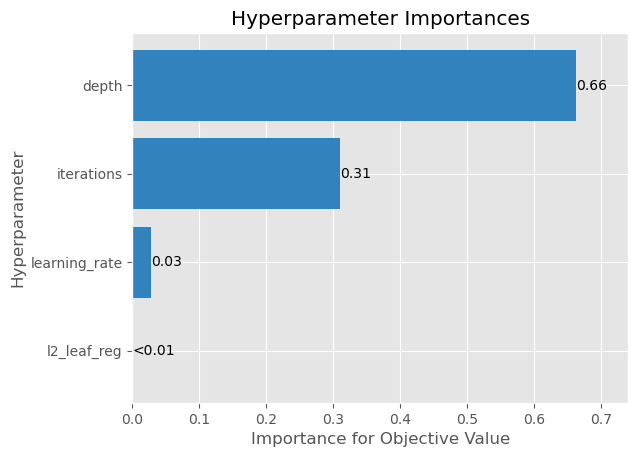

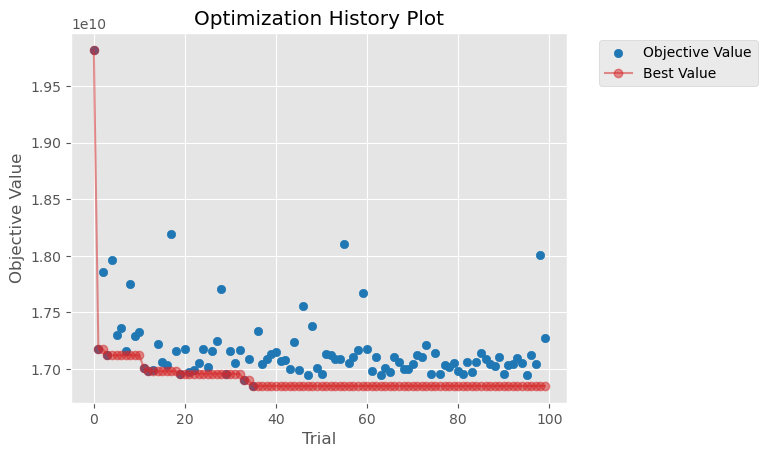

In [67]:
from optuna.visualization.matplotlib import plot_param_importances
from optuna.visualization.matplotlib import plot_optimization_history

# 하이퍼파라미터별 중요도 확인
plot_param_importances(study2)

# 하이퍼파라미터 최적화 과정 확인
import matplotlib.pyplot as plt
import numpy as np
plot_optimization_history(study2)

In [4]:
import optuna
from sklearn.ensemble import GradientBoostingRegressor

def objectiveGBR(trial):
    # Define the search space for each parameter
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 4000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 15),
        'max_features': trial.suggest_categorical('max_features', [1.0, 'sqrt', 'log2']),
        'random_state': 42,
    }

    # 모델 학습
    model = GradientBoostingRegressor(**params)
    model.fit(x_train, y_train)

    # 예측
    y_pred = model.predict(x_test)

    # 모델 평가    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"mse : {mse}")
    print(f"rmse : {rmse}")
    print(f"r2 : {r2}")
    
    return mse

# optimization study 진행
# direction: score 값을 최대 or 최소로 하는 방향으로 지정
study3 = optuna.create_study(direction='minimize')

# n_trials: 시도 횟수 (미입력시 key interrupt가 있을 때까지 무한 반복)
study3.optimize(objectiveGBR, n_trials=100)

# 모든 트라이얼이 완료되었는지 확인
if study3.best_trial is None:
    print("No trials completed.")
else:
    # 최적의 트라이얼 출력
    print('Best trial: score {}, \nparams {}'.format(study3.best_trial.value, study3.best_trial.params))


[I 2023-06-13 13:18:48,732] A new study created in memory with name: no-name-0334e6d7-21b7-40bd-9b72-494d1b72a7af
[I 2023-06-13 13:19:03,618] Trial 0 finished with value: 25291970430.75973 and parameters: {'n_estimators': 2823, 'learning_rate': 0.8660909725554088, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 0 with value: 25291970430.75973.


mse : 25291970430.75973
rmse : 159034.49446821192
r2 : 0.7557417687309957


[I 2023-06-13 13:19:17,038] Trial 1 finished with value: 18742410678.1389 and parameters: {'n_estimators': 1177, 'learning_rate': 0.1640637463996119, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 1 with value: 18742410678.1389.


mse : 18742410678.1389
rmse : 136902.92428629455
r2 : 0.8189944079488634


[I 2023-06-13 13:19:26,693] Trial 2 finished with value: 18157741863.00837 and parameters: {'n_estimators': 2334, 'learning_rate': 0.12467932197825625, 'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 2 with value: 18157741863.00837.


mse : 18157741863.00837
rmse : 134750.66553827617
r2 : 0.8246408707680768


[I 2023-06-13 13:19:48,811] Trial 3 finished with value: 23833800844.445175 and parameters: {'n_estimators': 3131, 'learning_rate': 0.460504377050872, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 11, 'max_features': 'log2'}. Best is trial 2 with value: 18157741863.00837.


mse : 23833800844.445175
rmse : 154381.99650362466
r2 : 0.7698241007113574


[I 2023-06-13 13:19:50,411] Trial 4 finished with value: 21198589065.14981 and parameters: {'n_estimators': 338, 'learning_rate': 0.5897864391588767, 'max_depth': 1, 'min_samples_split': 5, 'min_samples_leaf': 9, 'max_features': 1.0}. Best is trial 2 with value: 18157741863.00837.


mse : 21198589065.14981
rmse : 145597.35253482396
r2 : 0.7952737654574109


[I 2023-06-13 13:20:08,356] Trial 5 finished with value: 27289959600.88126 and parameters: {'n_estimators': 2439, 'learning_rate': 0.8548558228824853, 'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 13, 'max_features': 'log2'}. Best is trial 2 with value: 18157741863.00837.


mse : 27289959600.88126
rmse : 165196.72999451673
r2 : 0.7364461072037713


[I 2023-06-13 13:20:11,407] Trial 6 finished with value: 20283940143.67046 and parameters: {'n_estimators': 1701, 'learning_rate': 0.7005432328673135, 'max_depth': 1, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 18157741863.00837.


mse : 20283940143.67046
rmse : 142421.69828951787
r2 : 0.8041070245506186


[I 2023-06-13 13:20:13,955] Trial 7 finished with value: 20223205091.457626 and parameters: {'n_estimators': 310, 'learning_rate': 0.507913661242956, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 2 with value: 18157741863.00837.


mse : 20223205091.457626
rmse : 142208.31583088814
r2 : 0.8046935757831589


[I 2023-06-13 13:20:28,318] Trial 8 finished with value: 21633606989.004944 and parameters: {'n_estimators': 532, 'learning_rate': 0.29430229776785855, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 1.0}. Best is trial 2 with value: 18157741863.00837.


mse : 21633606989.004944
rmse : 147083.67342776337
r2 : 0.7910725621963972


[I 2023-06-13 13:20:32,472] Trial 9 finished with value: 20620130541.70994 and parameters: {'n_estimators': 2478, 'learning_rate': 0.28672989603253407, 'max_depth': 1, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 2 with value: 18157741863.00837.


mse : 20620130541.70994
rmse : 143597.11188498864
r2 : 0.8008602521324887


[I 2023-06-13 13:21:04,114] Trial 10 finished with value: 19210175574.72099 and parameters: {'n_estimators': 3812, 'learning_rate': 0.0514391156290161, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 15, 'max_features': 'sqrt'}. Best is trial 2 with value: 18157741863.00837.


mse : 19210175574.72099
rmse : 138600.77768440187
r2 : 0.8144769494692381


[I 2023-06-13 13:21:23,496] Trial 11 finished with value: 17770725071.886093 and parameters: {'n_estimators': 1404, 'learning_rate': 0.02237800666699849, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 1.0}. Best is trial 11 with value: 17770725071.886093.


mse : 17770725071.886093
rmse : 133306.88306267644
r2 : 0.8283785011409149


[I 2023-06-13 13:21:45,686] Trial 12 finished with value: 18123308157.67276 and parameters: {'n_estimators': 1627, 'learning_rate': 0.01096434661545792, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 6, 'max_features': 1.0}. Best is trial 11 with value: 17770725071.886093.


mse : 18123308157.67276
rmse : 134622.83668706717
r2 : 0.8249734156753366


[I 2023-06-13 13:22:00,884] Trial 13 finished with value: 18392281599.899952 and parameters: {'n_estimators': 1442, 'learning_rate': 0.029019820397042317, 'max_depth': 3, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 1.0}. Best is trial 11 with value: 17770725071.886093.


mse : 18392281599.899952
rmse : 135618.14627806985
r2 : 0.8223757937369189


[I 2023-06-13 13:22:19,756] Trial 14 finished with value: 20354929552.018257 and parameters: {'n_estimators': 984, 'learning_rate': 0.220350718113522, 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 7, 'max_features': 1.0}. Best is trial 11 with value: 17770725071.886093.


mse : 20354929552.018257
rmse : 142670.70320152718
r2 : 0.803421441457386


[I 2023-06-13 13:22:38,124] Trial 15 finished with value: 18644864097.20331 and parameters: {'n_estimators': 1885, 'learning_rate': 0.025954133859205097, 'max_depth': 3, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 1.0}. Best is trial 11 with value: 17770725071.886093.


mse : 18644864097.20331
rmse : 136546.1976665894
r2 : 0.8199364680145627


[I 2023-06-13 13:22:53,927] Trial 16 finished with value: 21103671532.21185 and parameters: {'n_estimators': 961, 'learning_rate': 0.34887004478241035, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 1.0}. Best is trial 11 with value: 17770725071.886093.


mse : 21103671532.21185
rmse : 145271.02784867963
r2 : 0.7961904353853357


[I 2023-06-13 13:23:15,586] Trial 17 finished with value: 19219395875.640377 and parameters: {'n_estimators': 1668, 'learning_rate': 0.1507050928051407, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 1.0}. Best is trial 11 with value: 17770725071.886093.


mse : 19219395875.640377
rmse : 138634.03577635752
r2 : 0.8143879040387721


[I 2023-06-13 13:23:29,527] Trial 18 finished with value: 18916644452.42926 and parameters: {'n_estimators': 2024, 'learning_rate': 0.11877861416811315, 'max_depth': 2, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 1.0}. Best is trial 11 with value: 17770725071.886093.


mse : 18916644452.42926
rmse : 137537.79281502689
r2 : 0.8173117381999012


[I 2023-06-13 13:23:44,534] Trial 19 finished with value: 19749527593.94948 and parameters: {'n_estimators': 801, 'learning_rate': 0.23250981783661348, 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_features': 1.0}. Best is trial 11 with value: 17770725071.886093.


mse : 19749527593.94948
rmse : 140533.0124702003
r2 : 0.8092681354462746


[I 2023-06-13 13:24:02,054] Trial 20 finished with value: 21871687943.471806 and parameters: {'n_estimators': 1384, 'learning_rate': 0.3755756966085477, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 1.0}. Best is trial 11 with value: 17770725071.886093.


mse : 21871687943.471806
rmse : 147890.79735896958
r2 : 0.7887732857127355


[I 2023-06-13 13:24:11,667] Trial 21 finished with value: 18033051022.855476 and parameters: {'n_estimators': 2410, 'learning_rate': 0.10486020646955671, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 12, 'max_features': 'sqrt'}. Best is trial 11 with value: 17770725071.886093.


mse : 18033051022.855476
rmse : 134287.19604956935
r2 : 0.8258450776192026


[I 2023-06-13 13:24:28,213] Trial 22 finished with value: 17502651805.601322 and parameters: {'n_estimators': 3130, 'learning_rate': 0.021510908909585666, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 12, 'max_features': 'sqrt'}. Best is trial 22 with value: 17502651805.601322.


mse : 17502651805.601322
rmse : 132297.5880566283
r2 : 0.8309674295936221


[I 2023-06-13 13:24:43,499] Trial 23 finished with value: 19163646389.542793 and parameters: {'n_estimators': 3385, 'learning_rate': 0.1674697609031987, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 13, 'max_features': 'sqrt'}. Best is trial 22 with value: 17502651805.601322.


mse : 19163646389.542793
rmse : 138432.82265973918
r2 : 0.8149263069641445


[I 2023-06-13 13:24:59,007] Trial 24 finished with value: 18573881173.504616 and parameters: {'n_estimators': 2900, 'learning_rate': 0.09417877061765044, 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 12, 'max_features': 'sqrt'}. Best is trial 22 with value: 17502651805.601322.


mse : 18573881173.504616
rmse : 136286.0270662573
r2 : 0.8206219884820333


[I 2023-06-13 13:25:07,658] Trial 25 finished with value: 18612858654.375874 and parameters: {'n_estimators': 3725, 'learning_rate': 0.08302335616075082, 'max_depth': 2, 'min_samples_split': 8, 'min_samples_leaf': 15, 'max_features': 'sqrt'}. Best is trial 22 with value: 17502651805.601322.


mse : 18612858654.375874
rmse : 136428.95093921918
r2 : 0.8202455618780643


[I 2023-06-13 13:25:28,696] Trial 26 finished with value: 21330613791.548084 and parameters: {'n_estimators': 3414, 'learning_rate': 0.20368360464683555, 'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 13, 'max_features': 'sqrt'}. Best is trial 22 with value: 17502651805.601322.


mse : 21330613791.548084
rmse : 146050.03865644158
r2 : 0.7939987313021204


[I 2023-06-13 13:25:37,283] Trial 27 finished with value: 18007316427.917038 and parameters: {'n_estimators': 2698, 'learning_rate': 0.09678187746329858, 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 11, 'max_features': 'sqrt'}. Best is trial 22 with value: 17502651805.601322.


mse : 18007316427.917038
rmse : 134191.34259674518
r2 : 0.8260936105146246


[I 2023-06-13 13:25:43,561] Trial 28 finished with value: 19802490699.505276 and parameters: {'n_estimators': 2750, 'learning_rate': 0.0268397790394588, 'max_depth': 2, 'min_samples_split': 6, 'min_samples_leaf': 11, 'max_features': 'sqrt'}. Best is trial 22 with value: 17502651805.601322.


mse : 19802490699.505276
rmse : 140721.3228317062
r2 : 0.8087566421041095


[I 2023-06-13 13:25:56,978] Trial 29 finished with value: 18468926187.33878 and parameters: {'n_estimators': 2838, 'learning_rate': 0.09304732283145255, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 17502651805.601322.


mse : 18468926187.33878
rmse : 135900.42747298031
r2 : 0.821635595522019


[I 2023-06-13 13:26:06,405] Trial 30 finished with value: 18783498435.03316 and parameters: {'n_estimators': 3180, 'learning_rate': 0.22801085525664977, 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 14, 'max_features': 'sqrt'}. Best is trial 22 with value: 17502651805.601322.


mse : 18783498435.03316
rmse : 137052.90378183586
r2 : 0.8185976012685268


[I 2023-06-13 13:26:15,049] Trial 31 finished with value: 17978779771.265663 and parameters: {'n_estimators': 2192, 'learning_rate': 0.08566183445552354, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 12, 'max_features': 'sqrt'}. Best is trial 22 with value: 17502651805.601322.


mse : 17978779771.265663
rmse : 134084.9722051866
r2 : 0.8263692044348009


[I 2023-06-13 13:26:25,183] Trial 32 finished with value: 18751462513.106647 and parameters: {'n_estimators': 2139, 'learning_rate': 0.14969493595886477, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 11, 'max_features': 'sqrt'}. Best is trial 22 with value: 17502651805.601322.


mse : 18751462513.106647
rmse : 136935.97961495235
r2 : 0.818906989485165


[I 2023-06-13 13:26:33,467] Trial 33 finished with value: 17977242951.430298 and parameters: {'n_estimators': 2655, 'learning_rate': 0.07084160404639023, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 22 with value: 17502651805.601322.


mse : 17977242951.430298
rmse : 134079.24131434478
r2 : 0.8263840463347547


[I 2023-06-13 13:26:42,336] Trial 34 finished with value: 18569411890.921577 and parameters: {'n_estimators': 2183, 'learning_rate': 0.16301321485441347, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 22 with value: 17502651805.601322.


mse : 18569411890.921577
rmse : 136269.62937838194
r2 : 0.8206651507600282


[I 2023-06-13 13:26:52,245] Trial 35 finished with value: 18684914099.62407 and parameters: {'n_estimators': 3096, 'learning_rate': 0.016649242673216352, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 22 with value: 17502651805.601322.


mse : 18684914099.62407
rmse : 136692.77266784836
r2 : 0.8195496834901859


[I 2023-06-13 13:26:58,196] Trial 36 finished with value: 18994215784.826107 and parameters: {'n_estimators': 2610, 'learning_rate': 0.06561056711780205, 'max_depth': 2, 'min_samples_split': 6, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 22 with value: 17502651805.601322.


mse : 18994215784.826107
rmse : 137819.5043701221
r2 : 0.8165625899079441


[I 2023-06-13 13:27:07,002] Trial 37 finished with value: 18987111563.575478 and parameters: {'n_estimators': 1954, 'learning_rate': 0.17364350503376091, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 12, 'max_features': 'sqrt'}. Best is trial 22 with value: 17502651805.601322.


mse : 18987111563.575478
rmse : 137793.72831727675
r2 : 0.8166311992130977


[I 2023-06-13 13:27:27,148] Trial 38 finished with value: 18480088333.365883 and parameters: {'n_estimators': 3483, 'learning_rate': 0.06649772072985223, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 14, 'max_features': 'sqrt'}. Best is trial 22 with value: 17502651805.601322.


mse : 18480088333.365883
rmse : 135941.48863892097
r2 : 0.821527796643588


[I 2023-06-13 13:27:39,044] Trial 39 finished with value: 18339156807.76122 and parameters: {'n_estimators': 2996, 'learning_rate': 0.12454976051092097, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 22 with value: 17502651805.601322.


mse : 18339156807.76122
rmse : 135422.14297433494
r2 : 0.8228888485738233


[I 2023-06-13 13:27:51,098] Trial 40 finished with value: 20090343036.63732 and parameters: {'n_estimators': 2288, 'learning_rate': 0.1967471144558119, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 22 with value: 17502651805.601322.


mse : 20090343036.63732
rmse : 141740.40721204848
r2 : 0.8059766964716801


[I 2023-06-13 13:27:59,647] Trial 41 finished with value: 18080778900.147778 and parameters: {'n_estimators': 2688, 'learning_rate': 0.125338007514233, 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 11, 'max_features': 'sqrt'}. Best is trial 22 with value: 17502651805.601322.


mse : 18080778900.147778
rmse : 134464.7868408223
r2 : 0.8253841437065381


[I 2023-06-13 13:28:08,636] Trial 42 finished with value: 17750609480.702988 and parameters: {'n_estimators': 2475, 'learning_rate': 0.06356422559802956, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 11, 'max_features': 'sqrt'}. Best is trial 22 with value: 17502651805.601322.


mse : 17750609480.702988
rmse : 133231.41326542696
r2 : 0.8285727682794428


[I 2023-06-13 13:28:18,102] Trial 43 finished with value: 17792361211.684265 and parameters: {'n_estimators': 2493, 'learning_rate': 0.06206683902690266, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 12, 'max_features': 'sqrt'}. Best is trial 22 with value: 17502651805.601322.


mse : 17792361211.684265
rmse : 133388.00999971572
r2 : 0.8281695492424039


[I 2023-06-13 13:28:31,004] Trial 44 finished with value: 17589188181.991737 and parameters: {'n_estimators': 2550, 'learning_rate': 0.015212113156284242, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 22 with value: 17502651805.601322.


mse : 17589188181.991737
rmse : 132624.23678193867
r2 : 0.8301317010253234


[I 2023-06-13 13:28:42,861] Trial 45 finished with value: 17509218672.671425 and parameters: {'n_estimators': 2458, 'learning_rate': 0.017330450379969865, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 22 with value: 17502651805.601322.


mse : 17509218672.671425
rmse : 132322.40427331807
r2 : 0.8309040098082829


[I 2023-06-13 13:28:53,569] Trial 46 finished with value: 17147118897.946941 and parameters: {'n_estimators': 1812, 'learning_rate': 0.02157866013907933, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 46 with value: 17147118897.946941.


mse : 17147118897.946941
rmse : 130947.00797630675
r2 : 0.8344010030836484


[I 2023-06-13 13:29:08,760] Trial 47 finished with value: 17313855865.824352 and parameters: {'n_estimators': 2296, 'learning_rate': 0.02503329220603763, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 46 with value: 17147118897.946941.


mse : 17313855865.824352
rmse : 131582.12593595055
r2 : 0.8327907340469836


[I 2023-06-13 13:29:22,336] Trial 48 finished with value: 17269298062.472942 and parameters: {'n_estimators': 1826, 'learning_rate': 0.016221346247094284, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 46 with value: 17147118897.946941.


mse : 17269298062.472942
rmse : 131412.70129813533
r2 : 0.8332210528418613


[I 2023-06-13 13:29:38,253] Trial 49 finished with value: 17098529139.897314 and parameters: {'n_estimators': 1910, 'learning_rate': 0.011137873686335575, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 17098529139.897314
rmse : 130761.34421111354
r2 : 0.8348702606447183


[I 2023-06-13 13:29:53,504] Trial 50 finished with value: 22186765731.9188 and parameters: {'n_estimators': 1789, 'learning_rate': 0.2632843770979098, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 22186765731.9188
rmse : 148952.22634092718
r2 : 0.7857304091789004


[I 2023-06-13 13:30:04,628] Trial 51 finished with value: 17617349949.041878 and parameters: {'n_estimators': 1519, 'learning_rate': 0.04093834633592857, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 17617349949.041878
rmse : 132730.36558769015
r2 : 0.8298597276166912


[I 2023-06-13 13:30:19,054] Trial 52 finished with value: 17169705620.478094 and parameters: {'n_estimators': 1821, 'learning_rate': 0.01223027083141557, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 17169705620.478094
rmse : 131033.22334613498
r2 : 0.8341828708938008


[I 2023-06-13 13:30:27,833] Trial 53 finished with value: 19211745504.219204 and parameters: {'n_estimators': 1191, 'learning_rate': 0.12632361268016376, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 19211745504.219204
rmse : 138606.44106324643
r2 : 0.8144617878113711


[I 2023-06-13 13:30:42,024] Trial 54 finished with value: 17939735229.21679 and parameters: {'n_estimators': 1779, 'learning_rate': 0.043055358711029654, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 17939735229.21679
rmse : 133939.29680723575
r2 : 0.8267462786848154


[I 2023-06-13 13:30:50,924] Trial 55 finished with value: 17442159370.22255 and parameters: {'n_estimators': 1252, 'learning_rate': 0.010082243979317706, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 17442159370.22255
rmse : 132068.76758046373
r2 : 0.8315516377442376


[I 2023-06-13 13:31:00,163] Trial 56 finished with value: 19192635611.747673 and parameters: {'n_estimators': 1308, 'learning_rate': 0.12940307940260626, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 19192635611.747673
rmse : 138537.48810970868
r2 : 0.8146463423737614


[I 2023-06-13 13:31:05,597] Trial 57 finished with value: 17878033990.385334 and parameters: {'n_estimators': 602, 'learning_rate': 0.06319703785209002, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 17878033990.385334
rmse : 133708.76557049406
r2 : 0.8273421609038515


[I 2023-06-13 13:31:17,891] Trial 58 finished with value: 20344043795.673763 and parameters: {'n_estimators': 1565, 'learning_rate': 0.16796088495803788, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 20344043795.673763
rmse : 142632.5481637125
r2 : 0.803526571091236


[I 2023-06-13 13:31:31,696] Trial 59 finished with value: 18974111680.90142 and parameters: {'n_estimators': 1878, 'learning_rate': 0.09737635235185761, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 18974111680.90142
rmse : 137746.5487077677
r2 : 0.8167567461078074


[I 2023-06-13 13:31:39,162] Trial 60 finished with value: 17474115826.86579 and parameters: {'n_estimators': 1061, 'learning_rate': 0.04444926705305743, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 17474115826.86579
rmse : 132189.6963717891
r2 : 0.8312430169667986


[I 2023-06-13 13:31:46,893] Trial 61 finished with value: 17376485400.488773 and parameters: {'n_estimators': 1128, 'learning_rate': 0.011286903512975009, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 17376485400.488773
rmse : 131819.89758943365
r2 : 0.8321858867732526


[I 2023-06-13 13:31:59,525] Trial 62 finished with value: 17549747038.533558 and parameters: {'n_estimators': 2064, 'learning_rate': 0.04352166446371813, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 17549747038.533558
rmse : 132475.4582499474
r2 : 0.83051260546955


[I 2023-06-13 13:32:00,698] Trial 63 finished with value: 21490183424.01485 and parameters: {'n_estimators': 130, 'learning_rate': 0.016368228788003123, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 21490183424.01485
rmse : 146595.3049180459
r2 : 0.792457681098172


[I 2023-06-13 13:32:11,665] Trial 64 finished with value: 19552197989.43673 and parameters: {'n_estimators': 1205, 'learning_rate': 0.10376811629179143, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 19552197989.43673
rmse : 139829.17431436377
r2 : 0.811173854113282


[I 2023-06-13 13:32:25,068] Trial 65 finished with value: 18064222621.770687 and parameters: {'n_estimators': 1692, 'learning_rate': 0.05860157857288152, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 18064222621.770687
rmse : 134403.2091200604
r2 : 0.8255440366371367


[I 2023-06-13 13:32:30,597] Trial 66 finished with value: 17868990651.082584 and parameters: {'n_estimators': 837, 'learning_rate': 0.01203291841908025, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 17868990651.082584
rmse : 133674.94399132018
r2 : 0.8274294973203202


[I 2023-06-13 13:32:48,977] Trial 67 finished with value: 20383914155.319393 and parameters: {'n_estimators': 2319, 'learning_rate': 0.1359475822788719, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 20383914155.319393
rmse : 142772.24574587104
r2 : 0.8031415214742534


[I 2023-06-13 13:32:58,590] Trial 68 finished with value: 18576117680.45348 and parameters: {'n_estimators': 1344, 'learning_rate': 0.09251641268267399, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 18576117680.45348
rmse : 136294.2320146142
r2 : 0.8206003893253742


[I 2023-06-13 13:33:10,791] Trial 69 finished with value: 20267535578.588253 and parameters: {'n_estimators': 1971, 'learning_rate': 0.1892269257824603, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 20267535578.588253
rmse : 142364.0951173724
r2 : 0.8042654523039123


[I 2023-06-13 13:33:25,898] Trial 70 finished with value: 18074977530.134018 and parameters: {'n_estimators': 1796, 'learning_rate': 0.04610074820620809, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 18074977530.134018
rmse : 134443.21303113078
r2 : 0.825440170672977


[I 2023-06-13 13:33:33,726] Trial 71 finished with value: 17430590081.776188 and parameters: {'n_estimators': 1110, 'learning_rate': 0.04368496221347179, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 17430590081.776188
rmse : 132024.96007110242
r2 : 0.8316633686171122


[I 2023-06-13 13:33:45,280] Trial 72 finished with value: 18663550163.456158 and parameters: {'n_estimators': 1498, 'learning_rate': 0.08057624329074639, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 18663550163.456158
rmse : 136614.60450279887
r2 : 0.8197560065710864


[I 2023-06-13 13:33:52,121] Trial 73 finished with value: 17647116603.577602 and parameters: {'n_estimators': 1065, 'learning_rate': 0.013222324082866853, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 17647116603.577602
rmse : 132842.45030703704
r2 : 0.8295722549420099


[I 2023-06-13 13:33:57,070] Trial 74 finished with value: 17915710675.43221 and parameters: {'n_estimators': 679, 'learning_rate': 0.1094118790019066, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 17915710675.43221
rmse : 133849.58227589732
r2 : 0.8269782967883678


[I 2023-06-13 13:34:06,609] Trial 75 finished with value: 19414901549.10928 and parameters: {'n_estimators': 1425, 'learning_rate': 0.14415678177900598, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 19414901549.10928
rmse : 139337.3659472192
r2 : 0.8124998000598709


[I 2023-06-13 13:34:22,796] Trial 76 finished with value: 18309273738.80563 and parameters: {'n_estimators': 2083, 'learning_rate': 0.0435227400290117, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 18309273738.80563
rmse : 135311.7649681861
r2 : 0.8231774455254908


[I 2023-06-13 13:34:28,832] Trial 77 finished with value: 17829621151.281982 and parameters: {'n_estimators': 884, 'learning_rate': 0.08114612532766717, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 17829621151.281982
rmse : 133527.60445421757
r2 : 0.827809709863015


[I 2023-06-13 13:34:42,725] Trial 78 finished with value: 17125053030.604311 and parameters: {'n_estimators': 1632, 'learning_rate': 0.010191669147135112, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 17125053030.604311
rmse : 130862.72590239099
r2 : 0.8346141050933665


[I 2023-06-13 13:34:58,556] Trial 79 finished with value: 18152801145.058784 and parameters: {'n_estimators': 1897, 'learning_rate': 0.04149932452453586, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 18152801145.058784
rmse : 134732.33147637127
r2 : 0.8246885859522641


[I 2023-06-13 13:35:15,994] Trial 80 finished with value: 20075083833.732517 and parameters: {'n_estimators': 2237, 'learning_rate': 0.10856212286671385, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 20075083833.732517
rmse : 141686.56899555624
r2 : 0.8061240628432448


[I 2023-06-13 13:35:25,540] Trial 81 finished with value: 18116021876.614574 and parameters: {'n_estimators': 1279, 'learning_rate': 0.06161535817273548, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 18116021876.614574
rmse : 134595.77213499157
r2 : 0.8250437832304731


[I 2023-06-13 13:35:38,948] Trial 82 finished with value: 17708174218.301254 and parameters: {'n_estimators': 1658, 'learning_rate': 0.035222760558860644, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 17708174218.301254
rmse : 133072.0640040623
r2 : 0.8289825885489255


[I 2023-06-13 13:35:47,743] Trial 83 finished with value: 17893878978.427696 and parameters: {'n_estimators': 1551, 'learning_rate': 0.01016014808427235, 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 17893878978.427696
rmse : 133768.0043150368
r2 : 0.8271891372885385


[I 2023-06-13 13:35:59,656] Trial 84 finished with value: 18519669683.760227 and parameters: {'n_estimators': 1761, 'learning_rate': 0.07612232576717332, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 18519669683.760227
rmse : 136086.99307340223
r2 : 0.8211455381451831


[I 2023-06-13 13:36:08,041] Trial 85 finished with value: 17361222153.335262 and parameters: {'n_estimators': 1120, 'learning_rate': 0.03651840484948906, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 17361222153.335262
rmse : 131761.99054862242
r2 : 0.8323332922023133


[I 2023-06-13 13:36:16,627] Trial 86 finished with value: 18397588678.09238 and parameters: {'n_estimators': 1099, 'learning_rate': 0.08121366148816597, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 18397588678.09238
rmse : 135637.71112081027
r2 : 0.8223245404138124


[I 2023-06-13 13:36:29,059] Trial 87 finished with value: 17453161119.929775 and parameters: {'n_estimators': 439, 'learning_rate': 0.0400800089100115, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': 1.0}. Best is trial 49 with value: 17098529139.897314.


mse : 17453161119.929775
rmse : 132110.41260979307
r2 : 0.8314453878997776


[I 2023-06-13 13:36:40,924] Trial 88 finished with value: 20190312250.013676 and parameters: {'n_estimators': 1605, 'learning_rate': 0.1511501401807626, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 20190312250.013676
rmse : 142092.61856273067
r2 : 0.8050112397348272


[I 2023-06-13 13:36:46,640] Trial 89 finished with value: 17941913563.5808 and parameters: {'n_estimators': 953, 'learning_rate': 0.11514854790683074, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 17941913563.5808
rmse : 133947.42835747462
r2 : 0.8267252413322563


[I 2023-06-13 13:36:52,521] Trial 90 finished with value: 17630284530.43074 and parameters: {'n_estimators': 717, 'learning_rate': 0.05837601802122846, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 17630284530.43074
rmse : 132779.08167490366
r2 : 0.8297348113717946


[I 2023-06-13 13:37:01,033] Trial 91 finished with value: 17323246795.20042 and parameters: {'n_estimators': 1244, 'learning_rate': 0.032282279092936544, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 17323246795.20042
rmse : 131617.8057680663
r2 : 0.83270004076527


[I 2023-06-13 13:37:12,069] Trial 92 finished with value: 17811269921.05841 and parameters: {'n_estimators': 1410, 'learning_rate': 0.03903819848289118, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 17811269921.05841
rmse : 133458.86977289448
r2 : 0.8279869376139446


[I 2023-06-13 13:37:23,638] Trial 93 finished with value: 18508724899.107327 and parameters: {'n_estimators': 1869, 'learning_rate': 0.07607448151308405, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 18508724899.107327
rmse : 136046.77467366628
r2 : 0.8212512378473181


[I 2023-06-13 13:37:31,805] Trial 94 finished with value: 17329609596.9113 and parameters: {'n_estimators': 1109, 'learning_rate': 0.029928789909524148, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 17329609596.9113
rmse : 131641.97505701325
r2 : 0.8326385917494225


[I 2023-06-13 13:37:39,675] Trial 95 finished with value: 17299179681.953773 and parameters: {'n_estimators': 967, 'learning_rate': 0.02865480057370451, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 17299179681.953773
rmse : 131526.3459613844
r2 : 0.8329324698885552


[I 2023-06-13 13:37:54,851] Trial 96 finished with value: 19718932938.98992 and parameters: {'n_estimators': 2007, 'learning_rate': 0.09632220190166402, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 19718932938.98992
rmse : 140424.11808158143
r2 : 0.8095636045686653


[I 2023-06-13 13:38:15,262] Trial 97 finished with value: 18022147195.88026 and parameters: {'n_estimators': 2398, 'learning_rate': 0.026399552612214928, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 18022147195.88026
rmse : 134246.5910028268
r2 : 0.8259503817709024


[I 2023-06-13 13:38:45,296] Trial 98 finished with value: 19404016437.190403 and parameters: {'n_estimators': 917, 'learning_rate': 0.11864095471381332, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 1.0}. Best is trial 49 with value: 17098529139.897314.


mse : 19404016437.190403
rmse : 139298.30019490691
r2 : 0.8126049234701543


[I 2023-06-13 13:39:06,750] Trial 99 finished with value: 19310879390.33732 and parameters: {'n_estimators': 2165, 'learning_rate': 0.06331892688137979, 'max_depth': 9, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 49 with value: 17098529139.897314.


mse : 19310879390.33732
rmse : 138963.59016065078
r2 : 0.8135043982814283
Best trial: score 17098529139.897314, 
params {'n_estimators': 1910, 'learning_rate': 0.011137873686335575, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 'log2'}


In [5]:
# Best trial의 파라미터
best_params = study3.best_trial.params

# 최적의 모델 학습
best_gbr = GradientBoostingRegressor(n_estimators=best_params['n_estimators'],
                                     learning_rate=best_params['learning_rate'],
                                     max_depth=best_params['max_depth'],
                                     min_samples_split=best_params['min_samples_split'],
                                     min_samples_leaf=best_params['min_samples_leaf'],
                                     max_features=best_params['max_features'],
                                     random_state=42)
best_gbr.fit(x_train, y_train)

# 저장 경로 설정
import pickle
import os
save_path = 'GradientBoostingRegressor_best_model.pkl'

# 모델을 'GradientBoostingRegressor_best_model.pkl' 파일로 저장
with open(save_path, 'wb') as f:
    pickle.dump(best_gbr, f)

# 저장된 모델 로드
with open('GradientBoostingRegressor_best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# 로드된 모델로 예측
y_pred = loaded_model.predict(x_test)

# 모델 평가
from evaluate_score import evaluate_score
evaluate_score(y_test, y_pred)

mse : 17098529139.897
rmse : 130761.344
r2 : 0.835


C:\Users\dohee\AppData\Local\Temp\ipykernel_22292\2101438053.py:5: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  plot_param_importances(study3)
C:\Users\dohee\AppData\Local\Temp\ipykernel_22292\2101438053.py:10: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  plot_optimization_history(study3)


<AxesSubplot:title={'center':'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

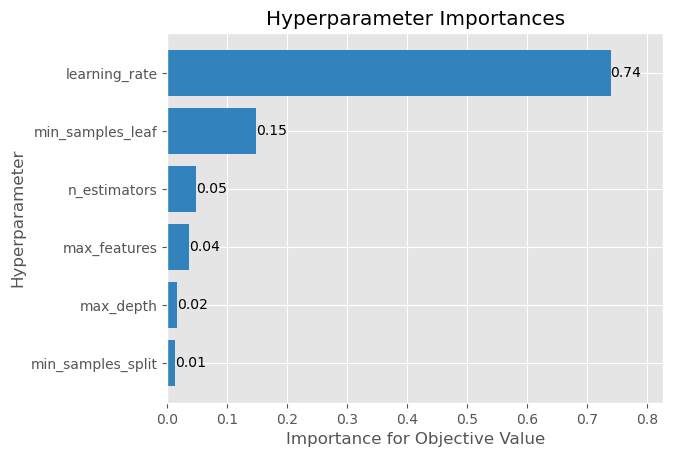

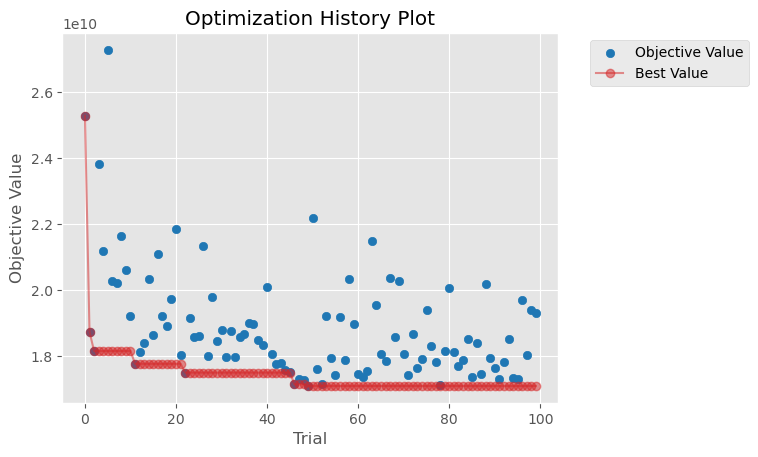

In [6]:
from optuna.visualization.matplotlib import plot_param_importances
from optuna.visualization.matplotlib import plot_optimization_history

# 하이퍼파라미터별 중요도 확인
plot_param_importances(study3)

# 하이퍼파라미터 최적화 과정 확인
import matplotlib.pyplot as plt
import numpy as np
plot_optimization_history(study3)

## XGBoost 를 이용한 가격 예측

In [9]:
#!pip install xgboost

In [10]:
import optuna
from xgboost import XGBRegressor

def objectiveXGB(trial):
    # Define the search space for each parameter
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 4000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 0.5),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'random_state': 42,
    }

    # 모델 학습
    model = XGBRegressor(**params)
    model.fit(x_train, y_train)

    # 예측
    y_pred = model.predict(x_test)

    # 모델 평가    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"mse : {mse}")
    print(f"rmse : {rmse}")
    print(f"r2 : {r2}")
    
    return mse

# optimization study 진행
# direction: score 값을 최대 or 최소로 하는 방향으로 지정
study4 = optuna.create_study(direction='minimize')

# n_trials: 시도 횟수 (미입력시 key interrupt가 있을 때까지 무한 반복)
study4.optimize(objectiveXGB, n_trials=100)

# 모든 트라이얼이 완료되었는지 확인
if study4.best_trial is None:
    print("No trials completed.")
else:
    # 최적의 트라이얼 출력
    print('Best trial: score {}, \nparams {}'.format(study4.best_trial.value, study4.best_trial.params))

[I 2023-06-13 13:47:57,214] A new study created in memory with name: no-name-70d9541d-21ea-436e-860d-1adcad9657e9
[I 2023-06-13 13:48:21,596] Trial 0 finished with value: 26063545444.846615 and parameters: {'n_estimators': 3802, 'learning_rate': 0.5431166716083784, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.45561373825239804, 'subsample': 0.8681732105970896, 'colsample_bytree': 0.659664397949555}. Best is trial 0 with value: 26063545444.846615.


mse : 26063545444.846615
rmse : 161442.0807746438
r2 : 0.7482902517071179


[I 2023-06-13 13:48:55,236] Trial 1 finished with value: 23187810186.50725 and parameters: {'n_estimators': 2748, 'learning_rate': 0.19406309324029572, 'max_depth': 6, 'min_child_weight': 7, 'gamma': 0.3255138705494942, 'subsample': 0.5254517554611513, 'colsample_bytree': 0.7805606646929035}. Best is trial 1 with value: 23187810186.50725.


mse : 23187810186.50725
rmse : 152275.44183651957
r2 : 0.7760627817171013


[I 2023-06-13 13:49:14,258] Trial 2 finished with value: 22659514447.33666 and parameters: {'n_estimators': 1628, 'learning_rate': 0.27500046218091684, 'max_depth': 7, 'min_child_weight': 10, 'gamma': 0.10689528784572011, 'subsample': 0.8968951220128936, 'colsample_bytree': 0.7235383104746704}. Best is trial 2 with value: 22659514447.33666.


mse : 22659514447.33666
rmse : 150530.77574813948
r2 : 0.7811648192665294


[I 2023-06-13 13:49:37,665] Trial 3 finished with value: 17935999120.45308 and parameters: {'n_estimators': 2179, 'learning_rate': 0.016744863005432195, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.27282032219447533, 'subsample': 0.5332738550942904, 'colsample_bytree': 0.557609061898444}. Best is trial 3 with value: 17935999120.45308.


mse : 17935999120.45308
rmse : 133925.34905854485
r2 : 0.8267823603068839


[I 2023-06-13 13:49:53,117] Trial 4 finished with value: 25184500087.262703 and parameters: {'n_estimators': 3320, 'learning_rate': 0.5236139550121306, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.4792357792064964, 'subsample': 0.9489870440777308, 'colsample_bytree': 0.6023594966808604}. Best is trial 3 with value: 17935999120.45308.


mse : 25184500087.262703
rmse : 158696.25101829818
r2 : 0.7567796679365291


[I 2023-06-13 13:50:05,568] Trial 5 finished with value: 25091882926.904873 and parameters: {'n_estimators': 2062, 'learning_rate': 0.4928119514432349, 'max_depth': 6, 'min_child_weight': 9, 'gamma': 0.18820285771884548, 'subsample': 0.990764259897501, 'colsample_bytree': 0.9334929360135416}. Best is trial 3 with value: 17935999120.45308.


mse : 25091882926.904873
rmse : 158404.17585059075
r2 : 0.757674121922868


[I 2023-06-13 13:50:24,940] Trial 6 finished with value: 21205198746.31368 and parameters: {'n_estimators': 3133, 'learning_rate': 0.12012929961610126, 'max_depth': 6, 'min_child_weight': 9, 'gamma': 0.1696007542915322, 'subsample': 0.505219967166415, 'colsample_bytree': 0.5288851400257852}. Best is trial 3 with value: 17935999120.45308.


mse : 21205198746.31368
rmse : 145620.04925941234
r2 : 0.795209932193223


[I 2023-06-13 13:50:35,048] Trial 7 finished with value: 26168366765.512894 and parameters: {'n_estimators': 2176, 'learning_rate': 0.5815542886737198, 'max_depth': 4, 'min_child_weight': 2, 'gamma': 0.3944841352730184, 'subsample': 0.554501764460535, 'colsample_bytree': 0.6451090977542075}. Best is trial 3 with value: 17935999120.45308.


mse : 26168366765.512894
rmse : 161766.39566211795
r2 : 0.747277935547121


[I 2023-06-13 13:50:50,510] Trial 8 finished with value: 55793133148.9458 and parameters: {'n_estimators': 1496, 'learning_rate': 0.9849856299842252, 'max_depth': 10, 'min_child_weight': 3, 'gamma': 0.04405517759389049, 'subsample': 0.6374775584552137, 'colsample_bytree': 0.5261365406882901}. Best is trial 3 with value: 17935999120.45308.


mse : 55793133148.9458
rmse : 236205.7009238892
r2 : 0.4611755514570959


[I 2023-06-13 13:51:37,429] Trial 9 finished with value: 27838995415.84257 and parameters: {'n_estimators': 3890, 'learning_rate': 0.40652888375024687, 'max_depth': 10, 'min_child_weight': 5, 'gamma': 0.18003725681200744, 'subsample': 0.6965364556107114, 'colsample_bytree': 0.7920645568902964}. Best is trial 3 with value: 17935999120.45308.


mse : 27838995415.84257
rmse : 166850.21850702676
r2 : 0.7311437715303637


[I 2023-06-13 13:51:39,021] Trial 10 finished with value: 25176976131.71534 and parameters: {'n_estimators': 615, 'learning_rate': 0.06890077472659581, 'max_depth': 1, 'min_child_weight': 5, 'gamma': 0.28092990382292593, 'subsample': 0.7702717824377073, 'colsample_bytree': 0.5167357162237723}. Best is trial 3 with value: 17935999120.45308.


mse : 25176976131.71534
rmse : 158672.5437235924
r2 : 0.7568523308426943


[I 2023-06-13 13:52:01,879] Trial 11 finished with value: 19112523895.45241 and parameters: {'n_estimators': 2819, 'learning_rate': 0.03754284577493425, 'max_depth': 8, 'min_child_weight': 7, 'gamma': 0.22284731536815772, 'subsample': 0.5197623551476874, 'colsample_bytree': 0.5272951782140435}. Best is trial 3 with value: 17935999120.45308.


mse : 19112523895.45241
rmse : 138248.05204939566
r2 : 0.8154200245263551


[I 2023-06-13 13:52:20,987] Trial 12 finished with value: 17889001545.051765 and parameters: {'n_estimators': 2490, 'learning_rate': 0.0213636060220219, 'max_depth': 8, 'min_child_weight': 7, 'gamma': 0.2698409021329601, 'subsample': 0.5936117785158219, 'colsample_bytree': 0.5010355591777618}. Best is trial 12 with value: 17889001545.051765.


mse : 17889001545.051765
rmse : 133749.77213084052
r2 : 0.8272362412993864


[I 2023-06-13 13:52:29,887] Trial 13 finished with value: 17051440753.981348 and parameters: {'n_estimators': 1043, 'learning_rate': 0.01601891675528705, 'max_depth': 8, 'min_child_weight': 4, 'gamma': 0.3125871090571217, 'subsample': 0.6034350861315876, 'colsample_bytree': 0.6000018173971925}. Best is trial 13 with value: 17051440753.981348.


mse : 17051440753.981348
rmse : 130581.16538759082
r2 : 0.8353250186434529


[I 2023-06-13 13:52:32,624] Trial 14 finished with value: 19803379617.211872 and parameters: {'n_estimators': 285, 'learning_rate': 0.2153976887728624, 'max_depth': 8, 'min_child_weight': 4, 'gamma': 0.3420295314279088, 'subsample': 0.617133260304797, 'colsample_bytree': 0.5990189166620048}. Best is trial 13 with value: 17051440753.981348.


mse : 19803379617.211872
rmse : 140724.4812291446
r2 : 0.8087480573452687


[I 2023-06-13 13:52:36,469] Trial 15 finished with value: 19854368671.569637 and parameters: {'n_estimators': 1067, 'learning_rate': 0.011288968718693096, 'max_depth': 3, 'min_child_weight': 7, 'gamma': 0.36549711495575576, 'subsample': 0.6145205484834195, 'colsample_bytree': 0.502996528705918}. Best is trial 13 with value: 17051440753.981348.


mse : 19854368671.569637
rmse : 140905.53101837286
r2 : 0.8082556284826934


[I 2023-06-13 13:52:45,538] Trial 16 finished with value: 22879390145.663418 and parameters: {'n_estimators': 1002, 'learning_rate': 0.2931401314414883, 'max_depth': 8, 'min_child_weight': 6, 'gamma': 0.28470164625217864, 'subsample': 0.7149863997078618, 'colsample_bytree': 0.5935357248961841}. Best is trial 13 with value: 17051440753.981348.


mse : 22879390145.663418
rmse : 151259.34730013684
r2 : 0.7790413607831598


[I 2023-06-13 13:53:01,080] Trial 17 finished with value: 21997090095.693962 and parameters: {'n_estimators': 1299, 'learning_rate': 0.1558350455555872, 'max_depth': 9, 'min_child_weight': 4, 'gamma': 0.41030954479544846, 'subsample': 0.5861762431628212, 'colsample_bytree': 0.6784753258719557}. Best is trial 13 with value: 17051440753.981348.


mse : 21997090095.693962
rmse : 148314.16013211268
r2 : 0.7875622093364221


[I 2023-06-13 13:53:15,486] Trial 18 finished with value: 21183583217.67397 and parameters: {'n_estimators': 1818, 'learning_rate': 0.11902190730998799, 'max_depth': 7, 'min_child_weight': 8, 'gamma': 0.24361804929696623, 'subsample': 0.6573701038974098, 'colsample_bytree': 0.5968827248236726}. Best is trial 13 with value: 17051440753.981348.


mse : 21183583217.67397
rmse : 145545.81140546082
r2 : 0.7954186850386343


[I 2023-06-13 13:53:40,186] Trial 19 finished with value: 27138924293.735165 and parameters: {'n_estimators': 2548, 'learning_rate': 0.3179726451389211, 'max_depth': 9, 'min_child_weight': 6, 'gamma': 0.32179819188976994, 'subsample': 0.5692496565820888, 'colsample_bytree': 0.5724667697661292}. Best is trial 13 with value: 17051440753.981348.


mse : 27138924293.735165
rmse : 164738.95803280766
r2 : 0.7379047368144485


[I 2023-06-13 13:53:41,554] Trial 20 finished with value: 17503852230.73447 and parameters: {'n_estimators': 157, 'learning_rate': 0.11336748014334525, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 0.39632948602747764, 'subsample': 0.7647223452127471, 'colsample_bytree': 0.6337367765278823}. Best is trial 13 with value: 17051440753.981348.


mse : 17503852230.73447
rmse : 132302.12481564484
r2 : 0.8309558364391625


[I 2023-06-13 13:53:42,459] Trial 21 finished with value: 17333814407.742897 and parameters: {'n_estimators': 100, 'learning_rate': 0.1356636574353647, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 0.4200683365690245, 'subsample': 0.786936945655188, 'colsample_bytree': 0.6311573352149574}. Best is trial 13 with value: 17051440753.981348.


mse : 17333814407.742897
rmse : 131657.94471942398
r2 : 0.8325979836181043


[I 2023-06-13 13:53:43,619] Trial 22 finished with value: 17524201620.105534 and parameters: {'n_estimators': 127, 'learning_rate': 0.14925463177333545, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 0.42884629911047273, 'subsample': 0.784230471519856, 'colsample_bytree': 0.7004549830403278}. Best is trial 13 with value: 17051440753.981348.


mse : 17524201620.105534
rmse : 132379.00747514892
r2 : 0.8307593113851424


[I 2023-06-13 13:53:47,446] Trial 23 finished with value: 18179157114.38832 and parameters: {'n_estimators': 500, 'learning_rate': 0.10701983139083737, 'max_depth': 7, 'min_child_weight': 1, 'gamma': 0.4978080910424979, 'subsample': 0.8194748162019179, 'colsample_bytree': 0.6409440117894766}. Best is trial 13 with value: 17051440753.981348.


mse : 18179157114.38832
rmse : 134830.10462944958
r2 : 0.8244340521084327


[I 2023-06-13 13:53:49,955] Trial 24 finished with value: 18752650511.01642 and parameters: {'n_estimators': 530, 'learning_rate': 0.21780683899913147, 'max_depth': 4, 'min_child_weight': 3, 'gamma': 0.37892266412913683, 'subsample': 0.7316891200398218, 'colsample_bytree': 0.632775950279256}. Best is trial 13 with value: 17051440753.981348.


mse : 18752650511.01642
rmse : 136940.31733210062
r2 : 0.8188955163471197


[I 2023-06-13 13:53:57,590] Trial 25 finished with value: 18968778062.381775 and parameters: {'n_estimators': 969, 'learning_rate': 0.09304575240152806, 'max_depth': 7, 'min_child_weight': 3, 'gamma': 0.43853882745496137, 'subsample': 0.6627298069711026, 'colsample_bytree': 0.6971900544117492}. Best is trial 13 with value: 17051440753.981348.


mse : 18968778062.381775
rmse : 137727.18708512772
r2 : 0.8168082557452016


[I 2023-06-13 13:54:05,856] Trial 26 finished with value: 20857435464.631073 and parameters: {'n_estimators': 758, 'learning_rate': 0.1838552848510161, 'max_depth': 9, 'min_child_weight': 5, 'gamma': 0.4102286547956344, 'subsample': 0.6983762581905465, 'colsample_bytree': 0.746640983801645}. Best is trial 13 with value: 17051440753.981348.


mse : 20857435464.631073
rmse : 144421.03539523276
r2 : 0.7985684702049862


[I 2023-06-13 13:54:06,634] Trial 27 finished with value: 17970433019.970116 and parameters: {'n_estimators': 107, 'learning_rate': 0.09210536705299169, 'max_depth': 5, 'min_child_weight': 4, 'gamma': 0.36139354779732363, 'subsample': 0.7453782624968248, 'colsample_bytree': 0.629527766293366}. Best is trial 13 with value: 17051440753.981348.


mse : 17970433019.970116
rmse : 134053.84373441187
r2 : 0.8264498135243091


[I 2023-06-13 13:54:07,571] Trial 28 finished with value: 22900926572.24379 and parameters: {'n_estimators': 346, 'learning_rate': 0.24157177363801394, 'max_depth': 1, 'min_child_weight': 1, 'gamma': 0.4550943764485334, 'subsample': 0.8046452168799257, 'colsample_bytree': 0.5615577573907766}. Best is trial 13 with value: 17051440753.981348.


mse : 22900926572.24379
rmse : 151330.52095411485
r2 : 0.778833371869098


[I 2023-06-13 13:54:12,500] Trial 29 finished with value: 17945870970.205914 and parameters: {'n_estimators': 782, 'learning_rate': 0.07724490755593372, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.4634664761175031, 'subsample': 0.8610877811925274, 'colsample_bytree': 0.667448176012272}. Best is trial 13 with value: 17051440753.981348.


mse : 17945870970.205914
rmse : 133962.19978115437
r2 : 0.8266870225171067


[I 2023-06-13 13:54:18,201] Trial 30 finished with value: 19956233543.361446 and parameters: {'n_estimators': 1232, 'learning_rate': 0.32660410062040207, 'max_depth': 4, 'min_child_weight': 5, 'gamma': 0.4004584180055786, 'subsample': 0.7477682326790639, 'colsample_bytree': 0.6639782109639168}. Best is trial 13 with value: 17051440753.981348.


mse : 19956233543.361446
rmse : 141266.5336991088
r2 : 0.8072718643477309


[I 2023-06-13 13:54:19,693] Trial 31 finished with value: 17901688049.766006 and parameters: {'n_estimators': 152, 'learning_rate': 0.16477141771539763, 'max_depth': 7, 'min_child_weight': 4, 'gamma': 0.4348056291985931, 'subsample': 0.7780924934313243, 'colsample_bytree': 0.6960436577265404}. Best is trial 13 with value: 17051440753.981348.


mse : 17901688049.766006
rmse : 133797.18999203984
r2 : 0.8271137208650466


[I 2023-06-13 13:54:22,892] Trial 32 finished with value: 18286603479.179737 and parameters: {'n_estimators': 369, 'learning_rate': 0.13456446577954206, 'max_depth': 8, 'min_child_weight': 4, 'gamma': 0.3240894656309847, 'subsample': 0.8028577311134428, 'colsample_bytree': 0.6220618025562671}. Best is trial 13 with value: 17051440753.981348.


mse : 18286603479.179737
rmse : 135227.9685537712
r2 : 0.8233963844782224


[I 2023-06-13 13:54:27,390] Trial 33 finished with value: 19148860944.432125 and parameters: {'n_estimators': 692, 'learning_rate': 0.17984211248581644, 'max_depth': 6, 'min_child_weight': 6, 'gamma': 0.43652660862412157, 'subsample': 0.7730838300646176, 'colsample_bytree': 0.7090179719633652}. Best is trial 13 with value: 17051440753.981348.


mse : 19148860944.432125
rmse : 138379.40939472217
r2 : 0.8150690980005781


[I 2023-06-13 13:54:28,343] Trial 34 finished with value: 17125446021.059393 and parameters: {'n_estimators': 107, 'learning_rate': 0.06964414397576607, 'max_depth': 7, 'min_child_weight': 3, 'gamma': 0.3563890595022503, 'subsample': 0.8370449834881517, 'colsample_bytree': 0.6656622021458574}. Best is trial 13 with value: 17051440753.981348.


mse : 17125446021.059393
rmse : 130864.22743079712
r2 : 0.8346103097720915


[I 2023-06-13 13:54:31,205] Trial 35 finished with value: 17244621798.194096 and parameters: {'n_estimators': 393, 'learning_rate': 0.05883852835800321, 'max_depth': 7, 'min_child_weight': 3, 'gamma': 0.3585671539586044, 'subsample': 0.8338389322630569, 'colsample_bytree': 0.6612949346600308}. Best is trial 13 with value: 17051440753.981348.


mse : 17244621798.194096
rmse : 131318.77930514773
r2 : 0.833459364865971


[I 2023-06-13 13:54:35,105] Trial 36 finished with value: 16891835600.091528 and parameters: {'n_estimators': 446, 'learning_rate': 0.014870026607747014, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.3091275254958878, 'subsample': 0.8464240852550237, 'colsample_bytree': 0.6711314045171097}. Best is trial 36 with value: 16891835600.091528.


mse : 16891835600.091528
rmse : 129968.59466844876
r2 : 0.8368664118969865


[I 2023-06-13 13:54:43,556] Trial 37 finished with value: 16654518340.988396 and parameters: {'n_estimators': 859, 'learning_rate': 0.011575398836499266, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.32185550012458364, 'subsample': 0.8412042080266674, 'colsample_bytree': 0.7344577650103008}. Best is trial 37 with value: 16654518340.988396.


mse : 16654518340.988396
rmse : 129052.38603368941
r2 : 0.8391583129616675


[I 2023-06-13 13:55:00,273] Trial 38 finished with value: 17647968761.959885 and parameters: {'n_estimators': 1683, 'learning_rate': 0.020780166802074746, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.3136180615579015, 'subsample': 0.8977084202403979, 'colsample_bytree': 0.7386359122508637}. Best is trial 37 with value: 16654518340.988396.


mse : 17647968761.959885
rmse : 132845.6576706965
r2 : 0.8295640251878361


[I 2023-06-13 13:55:16,374] Trial 39 finished with value: 18819042648.866566 and parameters: {'n_estimators': 1307, 'learning_rate': 0.044529344864524686, 'max_depth': 10, 'min_child_weight': 1, 'gamma': 0.2985962113095759, 'subsample': 0.8608746333099495, 'colsample_bytree': 0.7664765338117028}. Best is trial 37 with value: 16654518340.988396.


mse : 18819042648.866566
rmse : 137182.51582788007
r2 : 0.8182543315803638


[I 2023-06-13 13:55:26,430] Trial 40 finished with value: 16820384908.213636 and parameters: {'n_estimators': 849, 'learning_rate': 0.017145477363198044, 'max_depth': 10, 'min_child_weight': 2, 'gamma': 0.343328360699176, 'subsample': 0.8913581385659715, 'colsample_bytree': 0.8072408904370467}. Best is trial 37 with value: 16654518340.988396.


mse : 16820384908.213636
rmse : 129693.42661913762
r2 : 0.8375564498546386


[I 2023-06-13 13:55:36,972] Trial 41 finished with value: 18834781760.8452 and parameters: {'n_estimators': 866, 'learning_rate': 0.06630674085671984, 'max_depth': 10, 'min_child_weight': 2, 'gamma': 0.33716951255140637, 'subsample': 0.8955423009313905, 'colsample_bytree': 0.814276828987552}. Best is trial 37 with value: 16654518340.988396.


mse : 18834781760.8452
rmse : 137239.86942884052
r2 : 0.8181023304674346


[I 2023-06-13 13:55:48,073] Trial 42 finished with value: 16723397063.645575 and parameters: {'n_estimators': 1120, 'learning_rate': 0.010550905473144849, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.31015221326249476, 'subsample': 0.8334890954127203, 'colsample_bytree': 0.7319867007691143}. Best is trial 37 with value: 16654518340.988396.


mse : 16723397063.645575
rmse : 129318.97410529351
r2 : 0.8384931139011843


[I 2023-06-13 13:55:59,584] Trial 43 finished with value: 17342790448.03348 and parameters: {'n_estimators': 1150, 'learning_rate': 0.022822694769117465, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.30286624972195575, 'subsample': 0.9242555679672639, 'colsample_bytree': 0.8326113468794519}. Best is trial 37 with value: 16654518340.988396.


mse : 17342790448.03348
rmse : 131692.02879458378
r2 : 0.8325112971445778


[I 2023-06-13 13:56:16,817] Trial 44 finished with value: 19446245494.947548 and parameters: {'n_estimators': 1461, 'learning_rate': 0.07036584174204132, 'max_depth': 10, 'min_child_weight': 1, 'gamma': 0.2537837447173361, 'subsample': 0.879239108977671, 'colsample_bytree': 0.7272438141588844}. Best is trial 37 with value: 16654518340.988396.


mse : 19446245494.947548
rmse : 139449.79560740685
r2 : 0.8121970946303985


[I 2023-06-13 13:56:39,858] Trial 45 finished with value: 18424762121.29337 and parameters: {'n_estimators': 1905, 'learning_rate': 0.022854668205750994, 'max_depth': 10, 'min_child_weight': 2, 'gamma': 0.30251135927509765, 'subsample': 0.8354328016164752, 'colsample_bytree': 0.7722486270634272}. Best is trial 37 with value: 16654518340.988396.


mse : 18424762121.29337
rmse : 135737.8433646762
r2 : 0.8220621117828786


[I 2023-06-13 13:56:52,304] Trial 46 finished with value: 16907765455.411966 and parameters: {'n_estimators': 1516, 'learning_rate': 0.011032181990847987, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.33640021051045055, 'subsample': 0.9221039553568295, 'colsample_bytree': 0.7262868894962907}. Best is trial 37 with value: 16654518340.988396.


mse : 16907765455.411966
rmse : 130029.86370604241
r2 : 0.8367125686724899


[I 2023-06-13 13:57:07,345] Trial 47 finished with value: 19677502096.75067 and parameters: {'n_estimators': 1486, 'learning_rate': 0.10613919988587511, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.3387338646083512, 'subsample': 0.94968222306044, 'colsample_bytree': 0.7552067845579058}. Best is trial 37 with value: 16654518340.988396.


mse : 19677502096.75067
rmse : 140276.52011919412
r2 : 0.8099637246096502


[I 2023-06-13 13:57:15,149] Trial 48 finished with value: 20631704852.555008 and parameters: {'n_estimators': 872, 'learning_rate': 0.23374041259001604, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.2716699003573358, 'subsample': 0.9179707147099688, 'colsample_bytree': 0.7779582530391769}. Best is trial 37 with value: 16654518340.988396.


mse : 20631704852.555008
rmse : 143637.40756695313
r2 : 0.8007484727555947


[I 2023-06-13 13:57:49,925] Trial 49 finished with value: 19629998392.159878 and parameters: {'n_estimators': 3410, 'learning_rate': 0.052140198944663124, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.3757935616322789, 'subsample': 0.8588665290460951, 'colsample_bytree': 0.7262996291842301}. Best is trial 37 with value: 16654518340.988396.


mse : 19629998392.159878
rmse : 140107.09615205033
r2 : 0.8104224935653486


[I 2023-06-13 13:58:08,046] Trial 50 finished with value: 20012185933.770477 and parameters: {'n_estimators': 1589, 'learning_rate': 0.17302732256436718, 'max_depth': 10, 'min_child_weight': 2, 'gamma': 0.34292998653602846, 'subsample': 0.9750820878119719, 'colsample_bytree': 0.8069659275654443}. Best is trial 37 with value: 16654518340.988396.


mse : 20012185933.770477
rmse : 141464.4334586276
r2 : 0.8067315018657331


[I 2023-06-13 13:58:17,254] Trial 51 finished with value: 16801479221.91833 and parameters: {'n_estimators': 1069, 'learning_rate': 0.011652401341155893, 'max_depth': 8, 'min_child_weight': 3, 'gamma': 0.2889812308334238, 'subsample': 0.879587829611221, 'colsample_bytree': 0.7180044585262614}. Best is trial 37 with value: 16654518340.988396.


mse : 16801479221.91833
rmse : 129620.52006498944
r2 : 0.8377390322875915


[I 2023-06-13 13:58:28,967] Trial 52 finished with value: 16856782819.233395 and parameters: {'n_estimators': 1375, 'learning_rate': 0.013792693606290648, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.29131716695994375, 'subsample': 0.8774972370085208, 'colsample_bytree': 0.7452205063137379}. Best is trial 37 with value: 16654518340.988396.


mse : 16856782819.233395
rmse : 129833.67367225421
r2 : 0.837204935551239


[I 2023-06-13 13:58:35,301] Trial 53 finished with value: 17688173645.57413 and parameters: {'n_estimators': 610, 'learning_rate': 0.052698780151490404, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.22658074233174844, 'subsample': 0.8846509990178978, 'colsample_bytree': 0.7557854297487484}. Best is trial 37 with value: 16654518340.988396.


mse : 17688173645.57413
rmse : 132996.89336813145
r2 : 0.8291757448920452


[I 2023-06-13 13:58:46,144] Trial 54 finished with value: 20020143445.882336 and parameters: {'n_estimators': 1201, 'learning_rate': 0.12354831367438077, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.2884976415330874, 'subsample': 0.8700904351231001, 'colsample_bytree': 0.7908571302453848}. Best is trial 37 with value: 16654518340.988396.


mse : 20020143445.882336
rmse : 141492.55615007575
r2 : 0.8066546518694441


[I 2023-06-13 13:58:50,031] Trial 55 finished with value: 21772509149.916286 and parameters: {'n_estimators': 1354, 'learning_rate': 0.011644908882464784, 'max_depth': 2, 'min_child_weight': 10, 'gamma': 0.2737329750692734, 'subsample': 0.8407810452668639, 'colsample_bytree': 0.7101475564164641}. Best is trial 37 with value: 16654518340.988396.


mse : 21772509149.916286
rmse : 147555.10546882573
r2 : 0.7897311089380783


[I 2023-06-13 13:59:00,213] Trial 56 finished with value: 19667018647.2939 and parameters: {'n_estimators': 961, 'learning_rate': 0.0910025952631179, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.31841747424150907, 'subsample': 0.8503689118997886, 'colsample_bytree': 0.7390088967126753}. Best is trial 37 with value: 16654518340.988396.


mse : 19667018647.2939
rmse : 140239.14805536254
r2 : 0.8100649689483987


[I 2023-06-13 13:59:14,422] Trial 57 finished with value: 19005703083.245026 and parameters: {'n_estimators': 1071, 'learning_rate': 0.05154639778248228, 'max_depth': 10, 'min_child_weight': 2, 'gamma': 0.25751814460667, 'subsample': 0.8144738872670807, 'colsample_bytree': 0.8536010032792214}. Best is trial 37 with value: 16654518340.988396.


mse : 19005703083.245026
rmse : 137861.17322598494
r2 : 0.8164516508570882


[I 2023-06-13 13:59:18,787] Trial 58 finished with value: 19109316305.300724 and parameters: {'n_estimators': 514, 'learning_rate': 0.135114342067246, 'max_depth': 8, 'min_child_weight': 3, 'gamma': 0.29110057918274446, 'subsample': 0.8780987736587549, 'colsample_bytree': 0.6755873997517805}. Best is trial 37 with value: 16654518340.988396.


mse : 19109316305.300724
rmse : 138236.45071145572
r2 : 0.8154510019584706


[I 2023-06-13 13:59:37,492] Trial 59 finished with value: 20331723470.620506 and parameters: {'n_estimators': 1764, 'learning_rate': 0.0893731647858815, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.30739602534331595, 'subsample': 0.8253761424218056, 'colsample_bytree': 0.6875833581528787}. Best is trial 37 with value: 16654518340.988396.


mse : 20331723470.620506
rmse : 142589.35258503878
r2 : 0.8036455551306333


[I 2023-06-13 13:59:55,309] Trial 60 finished with value: 21394493626.7362 and parameters: {'n_estimators': 1987, 'learning_rate': 0.20596161216137723, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.23494253389161812, 'subsample': 0.850426836020965, 'colsample_bytree': 0.7621542388775358}. Best is trial 37 with value: 16654518340.988396.


mse : 21394493626.7362
rmse : 146268.56677610608
r2 : 0.7933818092003204


[I 2023-06-13 14:00:07,124] Trial 61 finished with value: 17046460060.111362 and parameters: {'n_estimators': 1417, 'learning_rate': 0.013824017201377783, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.33160622844819276, 'subsample': 0.9124534459984921, 'colsample_bytree': 0.7166731089355732}. Best is trial 37 with value: 16654518340.988396.


mse : 17046460060.111362
rmse : 130562.09273794352
r2 : 0.8353731198967145


[I 2023-06-13 14:00:29,116] Trial 62 finished with value: 19008407595.87418 and parameters: {'n_estimators': 2171, 'learning_rate': 0.04039753434886767, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.28335084851274694, 'subsample': 0.8974771386039831, 'colsample_bytree': 0.7313368707001663}. Best is trial 37 with value: 16654518340.988396.


mse : 19008407595.87418
rmse : 137870.9817034541
r2 : 0.816425531916571


[I 2023-06-13 14:00:36,343] Trial 63 finished with value: 16750716082.621765 and parameters: {'n_estimators': 868, 'learning_rate': 0.012161364026781373, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.34546000835173063, 'subsample': 0.935337802017676, 'colsample_bytree': 0.687260066051138}. Best is trial 37 with value: 16654518340.988396.


mse : 16750716082.621765
rmse : 129424.55749440199
r2 : 0.8382292793662912


[I 2023-06-13 14:00:40,582] Trial 64 finished with value: 18073135507.03028 and parameters: {'n_estimators': 855, 'learning_rate': 0.0959267011498304, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.2624770481161726, 'subsample': 0.9408829014630244, 'colsample_bytree': 0.6825792995488185}. Best is trial 37 with value: 16654518340.988396.


mse : 18073135507.03028
rmse : 134436.3622946942
r2 : 0.825457960085886


[I 2023-06-13 14:00:47,818] Trial 65 finished with value: 20128895304.19595 and parameters: {'n_estimators': 640, 'learning_rate': 0.13138023206133687, 'max_depth': 10, 'min_child_weight': 3, 'gamma': 0.3763654360383555, 'subsample': 0.8706647082672597, 'colsample_bytree': 0.6497014519643679}. Best is trial 37 with value: 16654518340.988396.


mse : 20128895304.19595
rmse : 141876.3380701516
r2 : 0.8056043763825411


[I 2023-06-13 14:00:58,378] Trial 66 finished with value: 18517661891.994976 and parameters: {'n_estimators': 1047, 'learning_rate': 0.05219843452386869, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.31948424078580967, 'subsample': 0.8866907037448403, 'colsample_bytree': 0.7115763912825539}. Best is trial 37 with value: 16654518340.988396.


mse : 18517661891.994976
rmse : 136079.61600473075
r2 : 0.8211649284756708


[I 2023-06-13 14:01:05,196] Trial 67 finished with value: 20257497152.283417 and parameters: {'n_estimators': 794, 'learning_rate': 0.1635466393528195, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.3497364486392208, 'subsample': 0.9055299654937525, 'colsample_bytree': 0.6859705021887529}. Best is trial 37 with value: 16654518340.988396.


mse : 20257497152.283417
rmse : 142328.83457783042
r2 : 0.8043623988135034


[I 2023-06-13 14:01:13,647] Trial 68 finished with value: 19890870189.28393 and parameters: {'n_estimators': 922, 'learning_rate': 0.112426051803558, 'max_depth': 8, 'min_child_weight': 3, 'gamma': 0.29502839876576076, 'subsample': 0.8068399581173803, 'colsample_bytree': 0.7441037214919074}. Best is trial 37 with value: 16654518340.988396.


mse : 19890870189.28393
rmse : 141034.99632815938
r2 : 0.8079031135934349


[I 2023-06-13 14:01:20,628] Trial 69 finished with value: 18440147522.228718 and parameters: {'n_estimators': 1146, 'learning_rate': 0.08367891269451586, 'max_depth': 6, 'min_child_weight': 3, 'gamma': 0.24286489274369485, 'subsample': 0.8472799097465901, 'colsample_bytree': 0.7005423550408291}. Best is trial 37 with value: 16654518340.988396.


mse : 18440147522.228718
rmse : 135794.5047571098
r2 : 0.8219135266487104


[I 2023-06-13 14:01:28,183] Trial 70 finished with value: 17629624741.30306 and parameters: {'n_estimators': 719, 'learning_rate': 0.04394645014459485, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.3865021310915019, 'subsample': 0.8238698008866202, 'colsample_bytree': 0.7518042880275}. Best is trial 37 with value: 16654518340.988396.


mse : 17629624741.30306
rmse : 132776.597114488
r2 : 0.8297411833120821


[I 2023-06-13 14:01:41,536] Trial 71 finished with value: 17857322356.392334 and parameters: {'n_estimators': 1569, 'learning_rate': 0.0337567590340768, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.33351715321417424, 'subsample': 0.9268487637795049, 'colsample_bytree': 0.7189877390700609}. Best is trial 37 with value: 16654518340.988396.


mse : 17857322356.392334
rmse : 133631.29257921714
r2 : 0.8275421843500148


[I 2023-06-13 14:01:52,705] Trial 72 finished with value: 19085400493.802742 and parameters: {'n_estimators': 1285, 'learning_rate': 0.07208505148235958, 'max_depth': 8, 'min_child_weight': 1, 'gamma': 0.36604099459533024, 'subsample': 0.8897637664373369, 'colsample_bytree': 0.7304339288564128}. Best is trial 37 with value: 16654518340.988396.


mse : 19085400493.802742
rmse : 138149.92035395006
r2 : 0.8156819698789753


[I 2023-06-13 14:01:55,211] Trial 73 finished with value: 18811679790.30122 and parameters: {'n_estimators': 272, 'learning_rate': 0.011850783140873667, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 0.32347206805207834, 'subsample': 0.9109129638686435, 'colsample_bytree': 0.6974544284079245}. Best is trial 37 with value: 16654518340.988396.


mse : 18811679790.30122
rmse : 137155.67720769424
r2 : 0.8183254386858847


[I 2023-06-13 14:01:58,711] Trial 74 finished with value: 17024357801.36596 and parameters: {'n_estimators': 471, 'learning_rate': 0.03465379719205907, 'max_depth': 7, 'min_child_weight': 8, 'gamma': 0.34785738451725834, 'subsample': 0.8714038714126169, 'colsample_bytree': 0.7413643633222246}. Best is trial 37 with value: 16654518340.988396.


mse : 17024357801.36596
rmse : 130477.42257327877
r2 : 0.8355865733578824


[I 2023-06-13 14:02:05,674] Trial 75 finished with value: 16706215379.654518 and parameters: {'n_estimators': 600, 'learning_rate': 0.012711946887018127, 'max_depth': 10, 'min_child_weight': 1, 'gamma': 0.3079892332288892, 'subsample': 0.9410772439724693, 'colsample_bytree': 0.7687559329589555}. Best is trial 37 with value: 16654518340.988396.


mse : 16706215379.654518
rmse : 129252.52562195649
r2 : 0.8386590467118906


[I 2023-06-13 14:02:14,035] Trial 76 finished with value: 19759338833.80188 and parameters: {'n_estimators': 627, 'learning_rate': 0.1505545537825216, 'max_depth': 10, 'min_child_weight': 2, 'gamma': 0.27920004662924847, 'subsample': 0.9394686566856549, 'colsample_bytree': 0.7854258202976555}. Best is trial 37 with value: 16654518340.988396.


mse : 19759338833.80188
rmse : 140567.91537830344
r2 : 0.8091733829990715


[I 2023-06-13 14:02:19,341] Trial 77 finished with value: 17263257147.49113 and parameters: {'n_estimators': 249, 'learning_rate': 0.0731379784883753, 'max_depth': 10, 'min_child_weight': 2, 'gamma': 0.3127505934478471, 'subsample': 0.9019694724308565, 'colsample_bytree': 0.7628010137742737}. Best is trial 37 with value: 16654518340.988396.


mse : 17263257147.49113
rmse : 131389.7147705677
r2 : 0.8332793932235546


[I 2023-06-13 14:02:24,766] Trial 78 finished with value: 18548808449.616207 and parameters: {'n_estimators': 455, 'learning_rate': 0.10877611661189507, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.3039933217695508, 'subsample': 0.8615826379341561, 'colsample_bytree': 0.777362771674208}. Best is trial 37 with value: 16654518340.988396.


mse : 18548808449.616207
rmse : 136194.0103294422
r2 : 0.8208641293309182


[I 2023-06-13 14:02:34,604] Trial 79 finished with value: 17944835458.081215 and parameters: {'n_estimators': 1137, 'learning_rate': 0.03728353567408577, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.2640193985705296, 'subsample': 0.9588725611375388, 'colsample_bytree': 0.6505685211582437}. Best is trial 37 with value: 16654518340.988396.


mse : 17944835458.081215
rmse : 133958.33478392157
r2 : 0.8266970230174919


[I 2023-06-13 14:02:43,176] Trial 80 finished with value: 16791798274.668087 and parameters: {'n_estimators': 793, 'learning_rate': 0.010006144678741877, 'max_depth': 10, 'min_child_weight': 3, 'gamma': 0.29339977497339803, 'subsample': 0.8847245009398867, 'colsample_bytree': 0.7022998160245341}. Best is trial 37 with value: 16654518340.988396.


mse : 16791798274.668087
rmse : 129583.17126335537
r2 : 0.8378325264286994


[I 2023-06-13 14:02:49,356] Trial 81 finished with value: 18369312408.678974 and parameters: {'n_estimators': 575, 'learning_rate': 0.0655827057562045, 'max_depth': 10, 'min_child_weight': 3, 'gamma': 0.2920622404366942, 'subsample': 0.8870294503922772, 'colsample_bytree': 0.672874713091919}. Best is trial 37 with value: 16654518340.988396.


mse : 18369312408.678974
rmse : 135533.43649697286
r2 : 0.8225976196336665


[I 2023-06-13 14:02:57,974] Trial 82 finished with value: 17535548428.76353 and parameters: {'n_estimators': 794, 'learning_rate': 0.03670001448787031, 'max_depth': 10, 'min_child_weight': 2, 'gamma': 0.3271034005733508, 'subsample': 0.9325669955135764, 'colsample_bytree': 0.7091838883557722}. Best is trial 37 with value: 16654518340.988396.


mse : 17535548428.76353
rmse : 132421.85782099393
r2 : 0.8306497291198562


[I 2023-06-13 14:03:08,634] Trial 83 finished with value: 16729791710.532715 and parameters: {'n_estimators': 983, 'learning_rate': 0.010755298981327186, 'max_depth': 10, 'min_child_weight': 3, 'gamma': 0.3126797708849295, 'subsample': 0.9065373322697384, 'colsample_bytree': 0.7492180401302908}. Best is trial 37 with value: 16654518340.988396.


mse : 16729791710.532715
rmse : 129343.69606027467
r2 : 0.8384313573392541


[I 2023-06-13 14:03:20,117] Trial 84 finished with value: 19765603713.79187 and parameters: {'n_estimators': 985, 'learning_rate': 0.08557719800495314, 'max_depth': 10, 'min_child_weight': 3, 'gamma': 0.2759989369138059, 'subsample': 0.9163839306869926, 'colsample_bytree': 0.7511918077531925}. Best is trial 37 with value: 16654518340.988396.


mse : 19765603713.79187
rmse : 140590.19778701453
r2 : 0.809112879666219


[I 2023-06-13 14:03:32,791] Trial 85 finished with value: 20264277418.988583 and parameters: {'n_estimators': 1088, 'learning_rate': 0.11352486895116767, 'max_depth': 10, 'min_child_weight': 4, 'gamma': 0.36075270333806636, 'subsample': 0.9041970306254499, 'colsample_bytree': 0.7703075170191401}. Best is trial 37 with value: 16654518340.988396.


mse : 20264277418.988583
rmse : 142352.65160504944
r2 : 0.8042969181125248


[I 2023-06-13 14:03:44,456] Trial 86 finished with value: 19104775132.037518 and parameters: {'n_estimators': 915, 'learning_rate': 0.06480298453386085, 'max_depth': 10, 'min_child_weight': 3, 'gamma': 0.3501258073403914, 'subsample': 0.8753540452540736, 'colsample_bytree': 0.7381078229900137}. Best is trial 37 with value: 16654518340.988396.


mse : 19104775132.037518
rmse : 138220.02435261512
r2 : 0.815494858523628


[I 2023-06-13 14:03:52,068] Trial 87 finished with value: 16707846404.005518 and parameters: {'n_estimators': 727, 'learning_rate': 0.011614867978735097, 'max_depth': 10, 'min_child_weight': 4, 'gamma': 0.2999370632727772, 'subsample': 0.9605141584604993, 'colsample_bytree': 0.7598664447188924}. Best is trial 37 with value: 16654518340.988396.


mse : 16707846404.005518
rmse : 129258.83491663352
r2 : 0.8386432950280026


[I 2023-06-13 14:03:59,733] Trial 88 finished with value: 17419116067.744793 and parameters: {'n_estimators': 706, 'learning_rate': 0.03520345297262474, 'max_depth': 10, 'min_child_weight': 4, 'gamma': 0.31179724011081017, 'subsample': 0.9617181428327962, 'colsample_bytree': 0.795162529268033}. Best is trial 37 with value: 16654518340.988396.


mse : 17419116067.744793
rmse : 131981.49896006178
r2 : 0.8317741793734563


[I 2023-06-13 14:04:07,191] Trial 89 finished with value: 19626473378.073433 and parameters: {'n_estimators': 796, 'learning_rate': 0.1463409297493239, 'max_depth': 10, 'min_child_weight': 4, 'gamma': 0.32113408413629574, 'subsample': 0.9969149119057572, 'colsample_bytree': 0.7269057130951228}. Best is trial 37 with value: 16654518340.988396.


mse : 19626473378.073433
rmse : 140094.5158743676
r2 : 0.8104565365320011


[I 2023-06-13 14:04:31,008] Trial 90 finished with value: 19944686948.451763 and parameters: {'n_estimators': 2474, 'learning_rate': 0.057528470071182045, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.3019371016010855, 'subsample': 0.932057670641969, 'colsample_bytree': 0.7639938506453402}. Best is trial 37 with value: 16654518340.988396.


mse : 19944686948.451763
rmse : 141225.65966725652
r2 : 0.8073833760568538


[I 2023-06-13 14:04:44,368] Trial 91 finished with value: 16914445634.071152 and parameters: {'n_estimators': 1260, 'learning_rate': 0.012183867385253858, 'max_depth': 10, 'min_child_weight': 3, 'gamma': 0.28691022075618394, 'subsample': 0.9509774549198795, 'colsample_bytree': 0.7503481801263735}. Best is trial 37 with value: 16654518340.988396.


mse : 16914445634.071152
rmse : 130055.54826331383
r2 : 0.8366480545758788


[I 2023-06-13 14:04:52,907] Trial 92 finished with value: 16861290629.024473 and parameters: {'n_estimators': 994, 'learning_rate': 0.010824861124483425, 'max_depth': 9, 'min_child_weight': 5, 'gamma': 0.3314185950827666, 'subsample': 0.9744646887736129, 'colsample_bytree': 0.7230327180157589}. Best is trial 37 with value: 16654518340.988396.


mse : 16861290629.024473
rmse : 129851.03245267045
r2 : 0.8371614011951682


[I 2023-06-13 14:05:00,711] Trial 93 finished with value: 17482047317.945324 and parameters: {'n_estimators': 682, 'learning_rate': 0.038406229971060094, 'max_depth': 10, 'min_child_weight': 2, 'gamma': 0.2960317886695584, 'subsample': 0.9151644980100404, 'colsample_bytree': 0.781639841190365}. Best is trial 37 with value: 16654518340.988396.


mse : 17482047317.945324
rmse : 132219.69338167942
r2 : 0.8311664182696857


[I 2023-06-13 14:05:14,201] Trial 94 finished with value: 19630896383.078075 and parameters: {'n_estimators': 1392, 'learning_rate': 0.07802784780637309, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.28070268785458363, 'subsample': 0.8870442671949912, 'colsample_bytree': 0.6992621059113671}. Best is trial 37 with value: 16654518340.988396.


mse : 19630896383.078075
rmse : 140110.30077434733
r2 : 0.8104138211815983


[I 2023-06-13 14:05:27,475] Trial 95 finished with value: 18842641314.24377 and parameters: {'n_estimators': 1185, 'learning_rate': 0.05643337659516541, 'max_depth': 10, 'min_child_weight': 5, 'gamma': 0.2662629965907081, 'subsample': 0.9242375412589235, 'colsample_bytree': 0.7368472184880049}. Best is trial 37 with value: 16654518340.988396.


mse : 18842641314.24377
rmse : 137268.50080861148
r2 : 0.8180264265113962


[I 2023-06-13 14:05:35,973] Trial 96 finished with value: 19354667682.32268 and parameters: {'n_estimators': 894, 'learning_rate': 0.09689486777175088, 'max_depth': 9, 'min_child_weight': 4, 'gamma': 0.34161492742758365, 'subsample': 0.8962824812702507, 'colsample_bytree': 0.7190308758965234}. Best is trial 37 with value: 16654518340.988396.


mse : 19354667682.32268
rmse : 139121.0540584087
r2 : 0.8130815110738097


[I 2023-06-13 14:05:42,747] Trial 97 finished with value: 17203239159.212555 and parameters: {'n_estimators': 579, 'learning_rate': 0.03173742143834667, 'max_depth': 10, 'min_child_weight': 2, 'gamma': 0.3140017205373317, 'subsample': 0.8821656969154019, 'colsample_bytree': 0.7587602246623127}. Best is trial 37 with value: 16654518340.988396.


mse : 17203239159.212555
rmse : 131161.11908341036
r2 : 0.8338590193820377


[I 2023-06-13 14:05:51,474] Trial 98 finished with value: 19545558158.635296 and parameters: {'n_estimators': 823, 'learning_rate': 0.12479581106958791, 'max_depth': 9, 'min_child_weight': 1, 'gamma': 0.24898299637417792, 'subsample': 0.8577842581352353, 'colsample_bytree': 0.7486661437745544}. Best is trial 37 with value: 16654518340.988396.


mse : 19545558158.635296
rmse : 139805.42964647437
r2 : 0.8112379785488186


[I 2023-06-13 14:06:03,195] Trial 99 finished with value: 19396964455.19963 and parameters: {'n_estimators': 1071, 'learning_rate': 0.08265162126499631, 'max_depth': 10, 'min_child_weight': 2, 'gamma': 0.32640387575024926, 'subsample': 0.9425164668350813, 'colsample_bytree': 0.687288312027094}. Best is trial 37 with value: 16654518340.988396.


mse : 19396964455.19963
rmse : 139272.98537476544
r2 : 0.8126730282725351
Best trial: score 16654518340.988396, 
params {'n_estimators': 859, 'learning_rate': 0.011575398836499266, 'max_depth': 9, 'min_child_weight': 2, 'gamma': 0.32185550012458364, 'subsample': 0.8412042080266674, 'colsample_bytree': 0.7344577650103008}


In [11]:
# Best trial의 파라미터
best_params = study4.best_trial.params

# 최적의 모델 학습
best_xgb = XGBRegressor(n_estimators=best_params['n_estimators'],
                        learning_rate=best_params['learning_rate'],
                        max_depth=best_params['max_depth'],
                        min_child_weight=best_params['min_child_weight'],
                        gamma=best_params['gamma'],
                        subsample=best_params['subsample'],
                        colsample_bytree=best_params['colsample_bytree'],
                        random_state=42)
best_xgb.fit(x_train, y_train)

# 저장 경로 설정
import pickle
import os
save_path = 'XGBRegressor_best_model.pkl'

# 모델을 'XGBRegressor_best_model.pkl' 파일로 저장
with open(save_path, 'wb') as f:
    pickle.dump(best_xgb, f)

# 저장된 모델 로드
with open('XGBRegressor_best_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# 로드된 모델로 예측
y_pred = loaded_model.predict(x_test)

# 모델 평가
from evaluate_score import evaluate_score
evaluate_score(y_test, y_pred)


mse : 16654518340.988
rmse : 129052.386
r2 : 0.839


C:\Users\dohee\AppData\Local\Temp\ipykernel_22292\941271295.py:5: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  plot_param_importances(study4)
C:\Users\dohee\AppData\Local\Temp\ipykernel_22292\941271295.py:10: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  plot_optimization_history(study4)


<AxesSubplot:title={'center':'Optimization History Plot'}, xlabel='Trial', ylabel='Objective Value'>

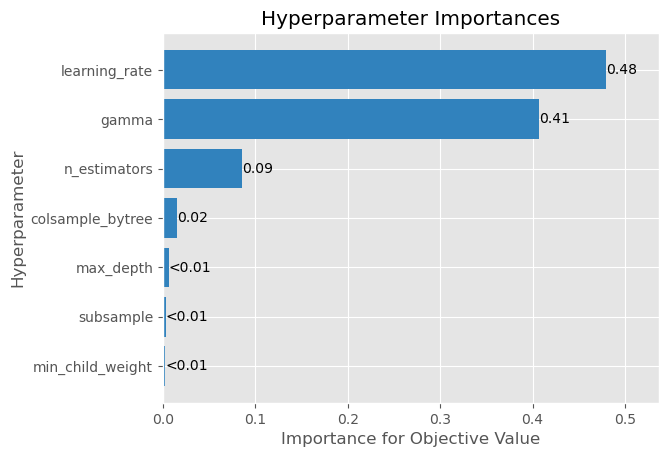

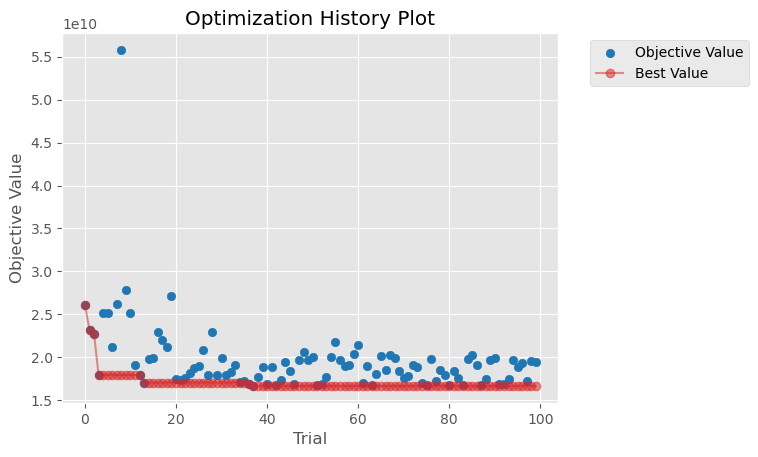

In [12]:
from optuna.visualization.matplotlib import plot_param_importances
from optuna.visualization.matplotlib import plot_optimization_history

# 하이퍼파라미터별 중요도 확인
plot_param_importances(study4)

# 하이퍼파라미터 최적화 과정 확인
import matplotlib.pyplot as plt
import numpy as np
plot_optimization_history(study4)